# INFO8066: Data Analytics – Life Expectancy Analysis
---

# **Project Title:**<br> **Life Expectancy Analysis: Factors Influencing Global Health Outcomes**

## **Dataset Description**
The dataset contains country-wise data on various health, economic, and demographic factors that potentially influence life expectancy. It spans multiple years and includes features such as:
- **Health Indicators**: Life expectancy, adult mortality, infant deaths, alcohol consumption, Hepatitis B immunization, BMI.
- **Economic Indicators**: GDP, percentage expenditure on healthcare.
- **Demographic Factors**: Population, schooling, and income.
- **Target Variable**: Life Expectancy.

The data is loaded into a Pandas DataFrame for analysis.

## **Business Problem**
**Objective**: Identify key factors influencing life expectancy and provide actionable insights for policymakers and public health organizations.



# Import Necessary Library

In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Dataset

In [281]:
df= pd.read_csv('Life Expectancy Data.csv')

In [282]:
# Head
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [283]:
#tail
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


# Removing any extra space between the column name

In [285]:
df.columns = df.columns.str.strip()

# Lets conduct the sanity check of the data

In [287]:
# Shape of the data
df.shape

(2938, 22)

* Number of Rows: 2938



* Number of Columns: 22

In [289]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

* Data types present in the data

## dtypes: 
## float64(16) - 16 Columns with float data type
## int64(4)  - 4 columns with int data type
## object(2) - 2 columns with object data type

In [291]:
# finding missing values in the dataset
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [292]:
# Lets find the percentage of the missing values
df.isnull().sum()/df.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

## Missing Values Analysis

- The dataset contains columns with varying levels of missing values:
  - *No Missing Values*: Country, Year, Status, infant deaths, percentage expenditure, Measles, HIV/AIDS.
  - *Minimal Missing Values (< 1%)*: Life expectancy, Adult Mortality, BMI, thinness 1-19 years, thinness 5-9 years.
  - *Moderate Missing Values (1-10%)*: Alcohol, Total expenditure, Polio, Diphtheria, Income composition of resources, Schooling.
  - *Significant Missing Values (> 10%)*: Hepatitis B, GDP, Population.

- *Key Observations*:
  - Columns like Hepatitis B, GDP, and Population have over 15 percent missinghissing values.

In [294]:
# Finding Duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool

In [295]:
df.duplicated().sum()

0

## Our dataset has zero duplicate values

# Understanding the Data


## To understand and co relate the data with the business problem, we will be doing EDA steps in order to check the data

## EDA (Exploratory Data Analysis)

In [300]:
# Descriptive Statistics
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [301]:
df.describe(include='object')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


## Categorical Data Summary

- The dataset contains two categorical columns: Country and Status.

- *Summary*:
  - Country:
    - Total entries: 2938
    - Unique values: 193
    - Most frequent value: Afghanistan (16 occurrences)
  - Status:
    - Total entries: 2938
    - Unique values: 2
    - Most frequent value: Developing (2426 occurrences)

# General histogram plot understand the skewness in each numerical column of the data

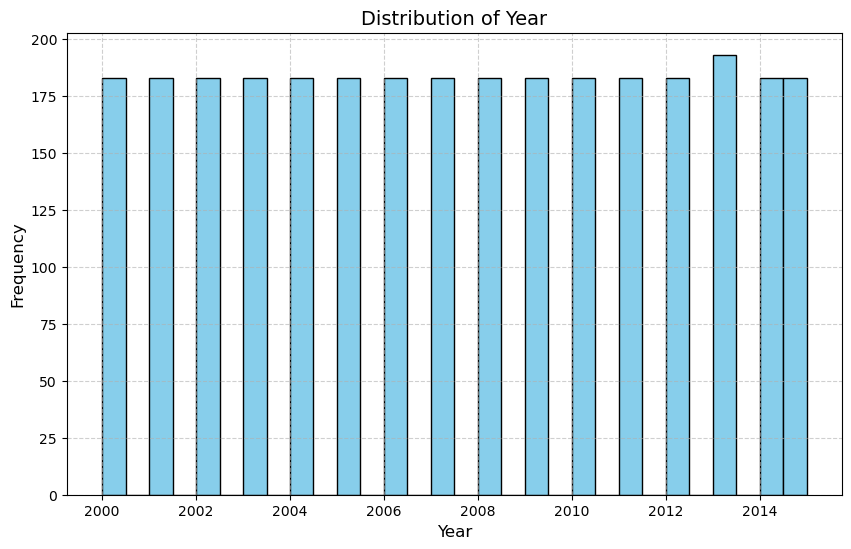

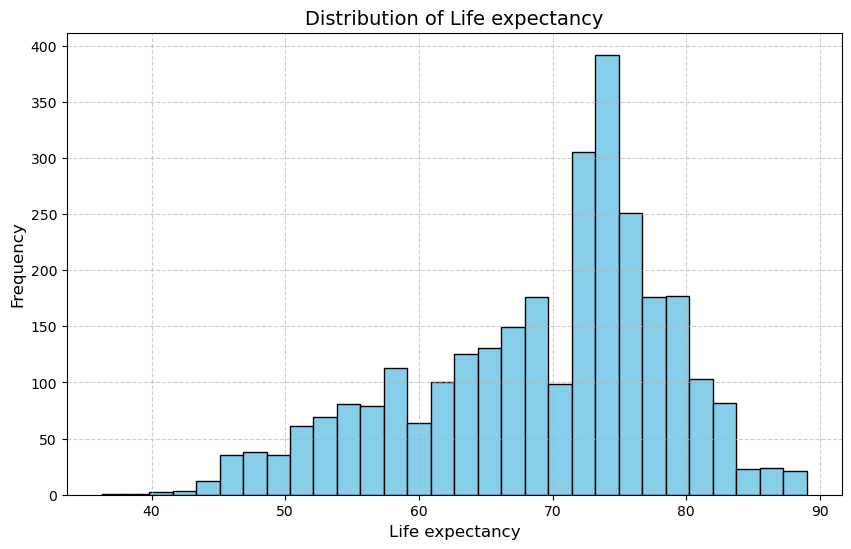

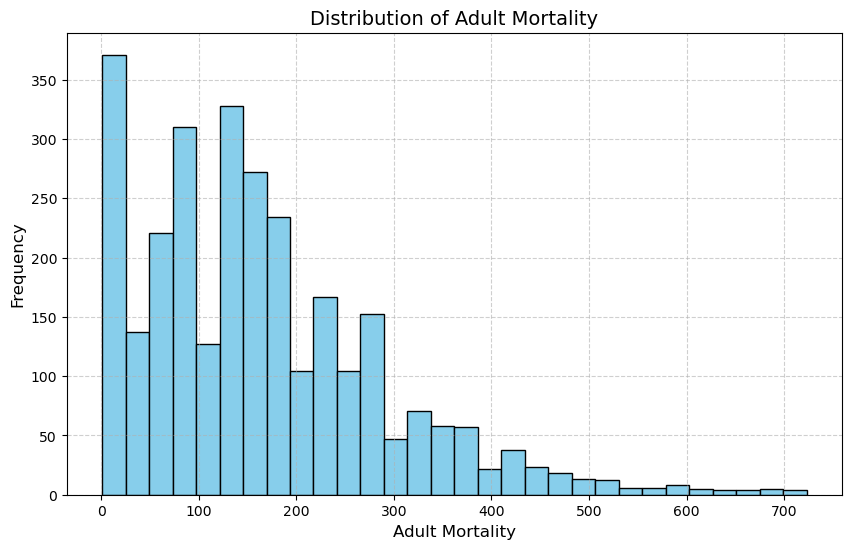

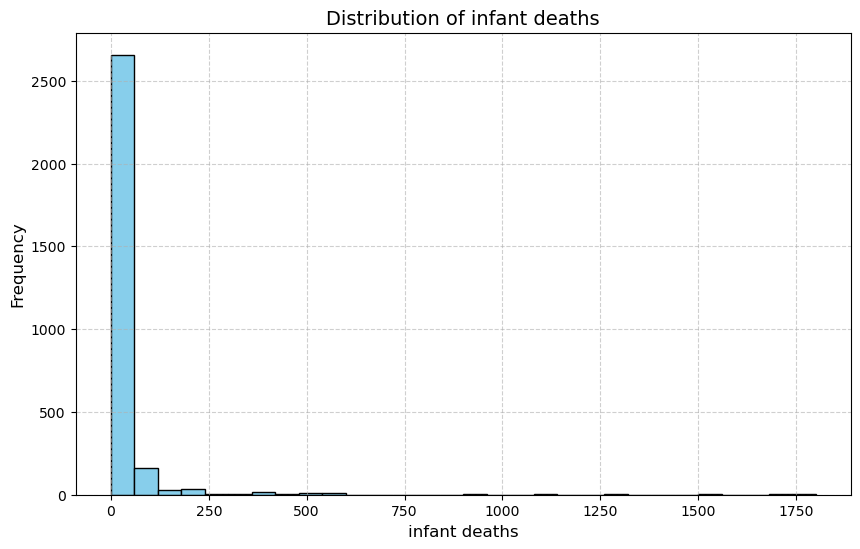

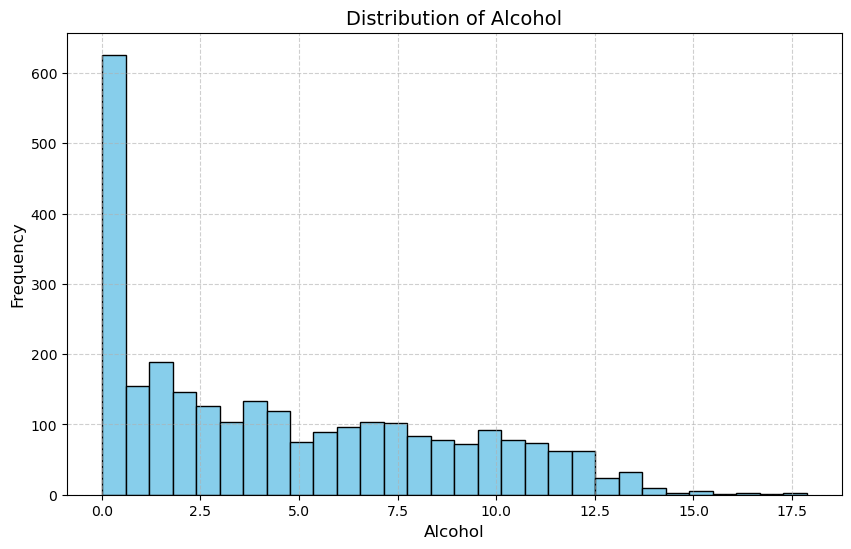

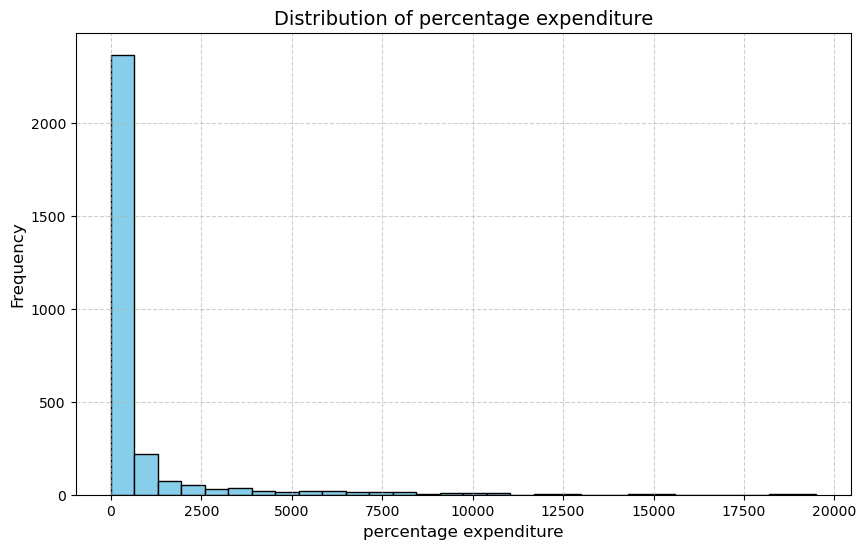

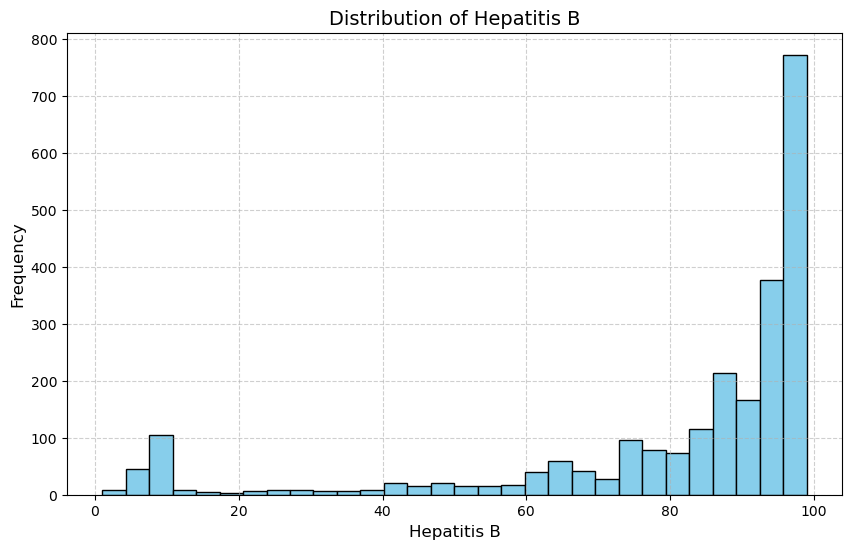

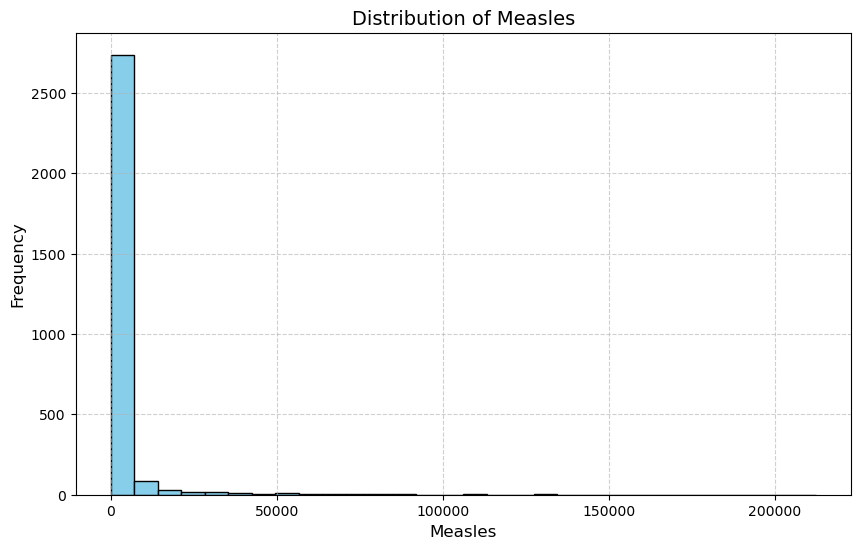

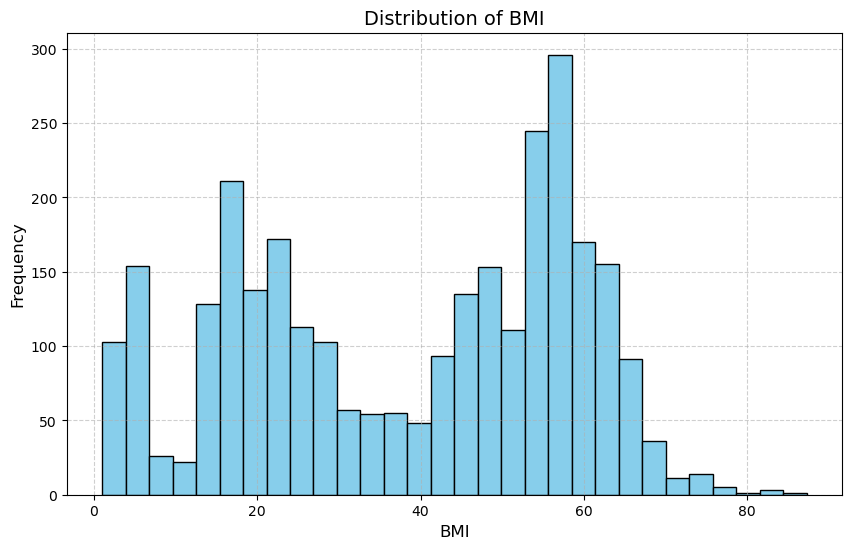

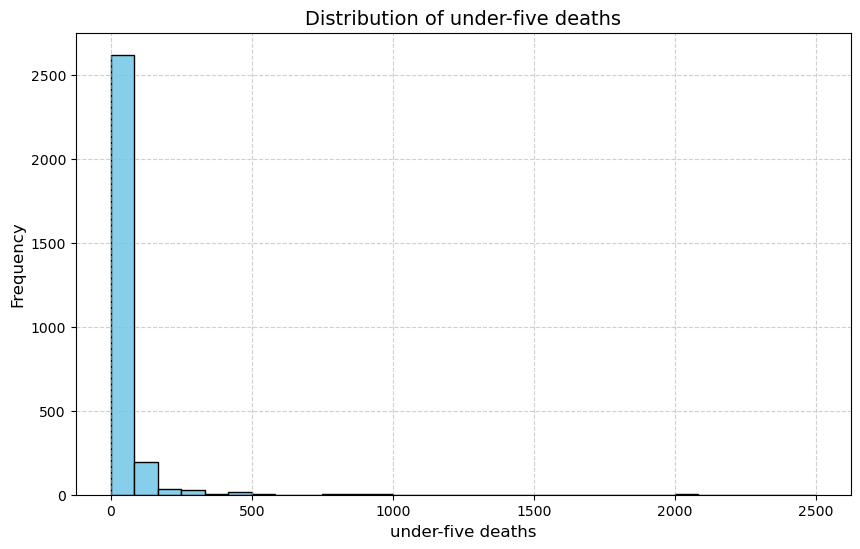

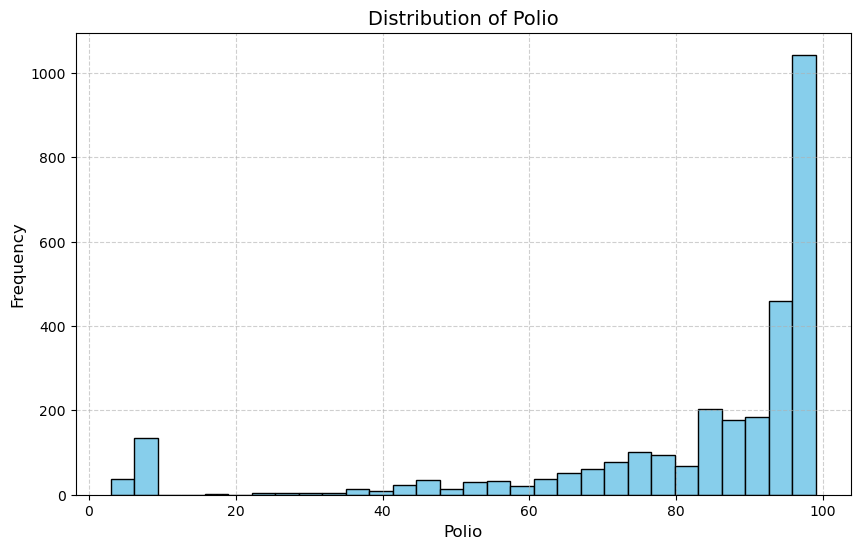

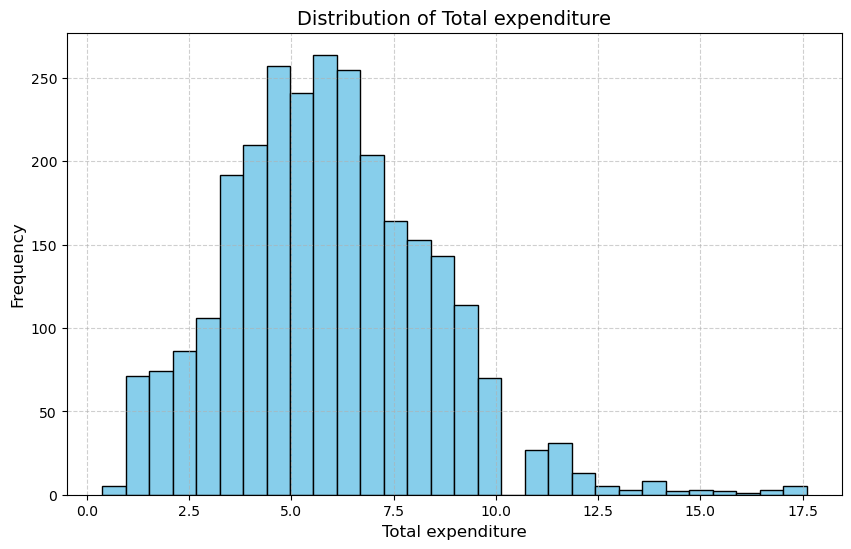

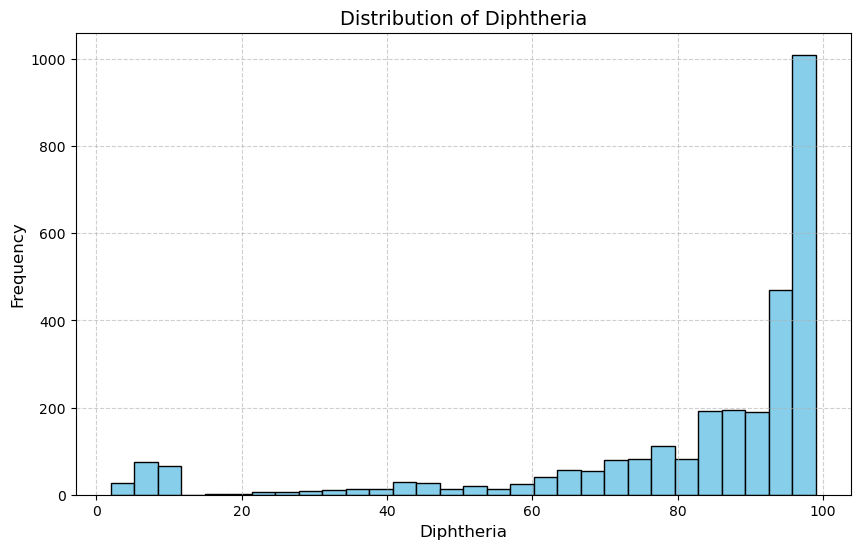

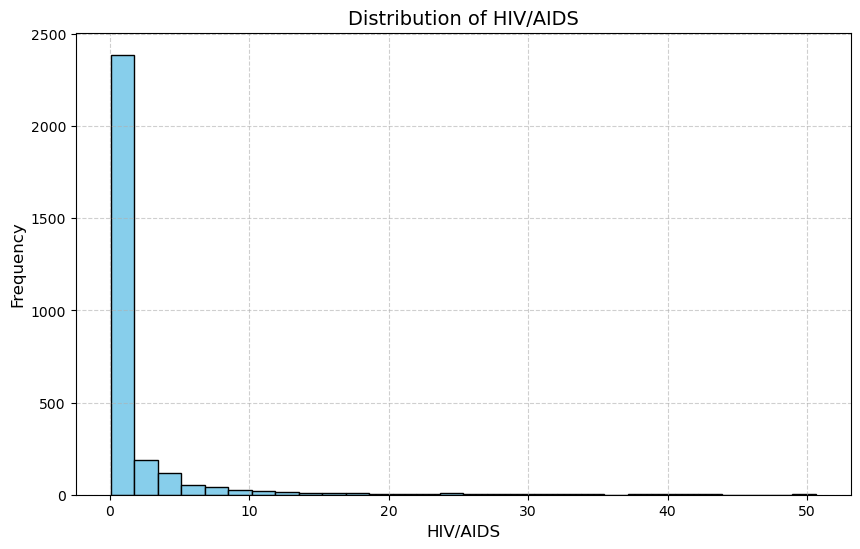

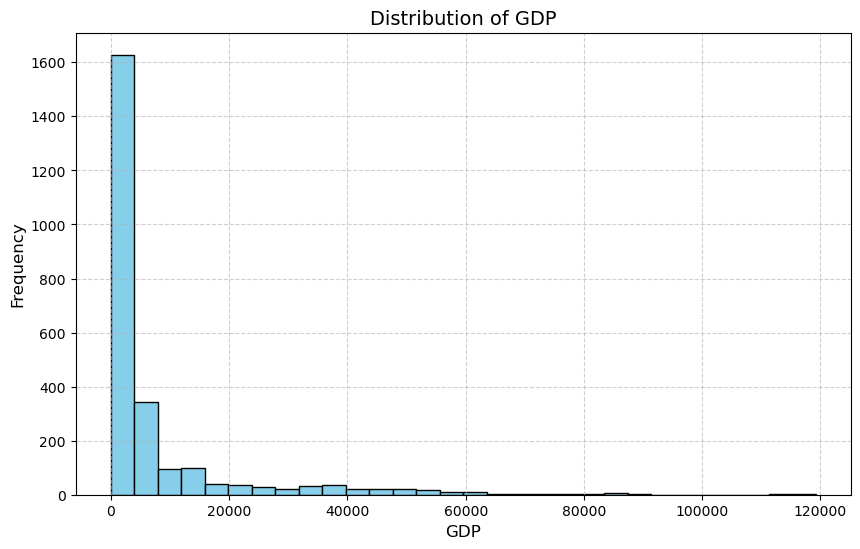

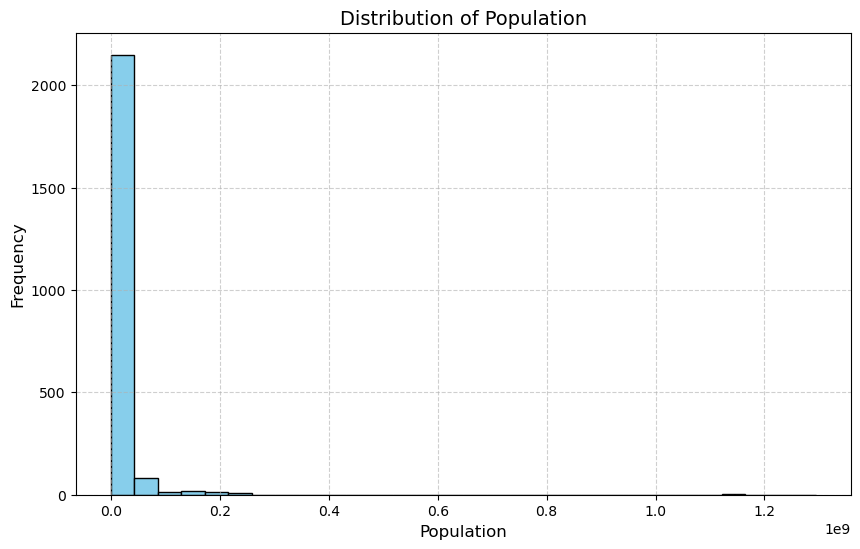

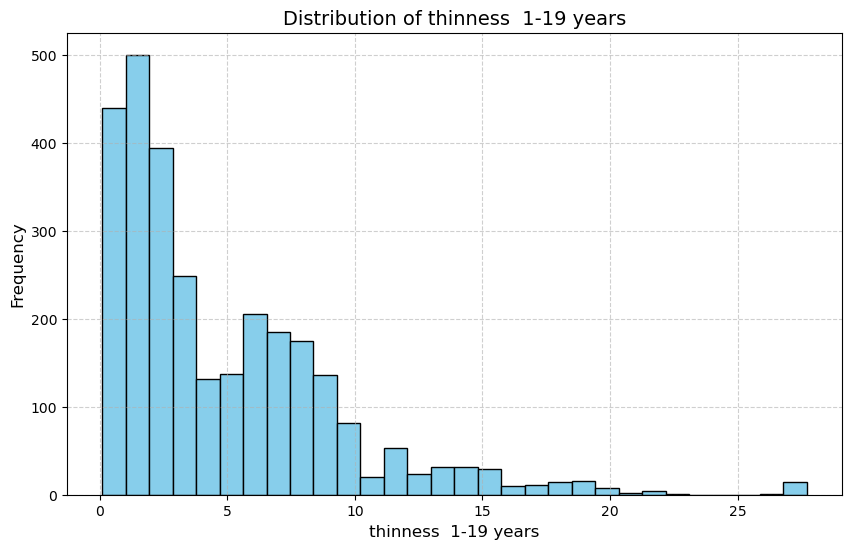

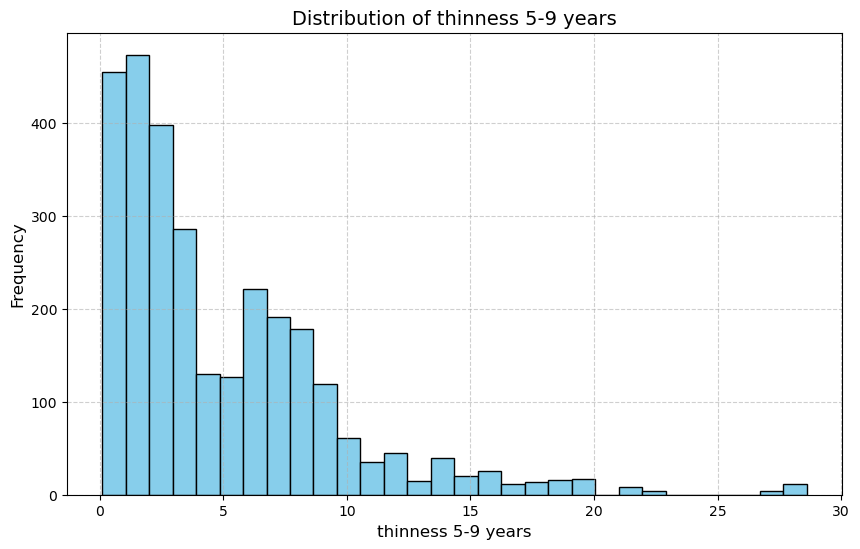

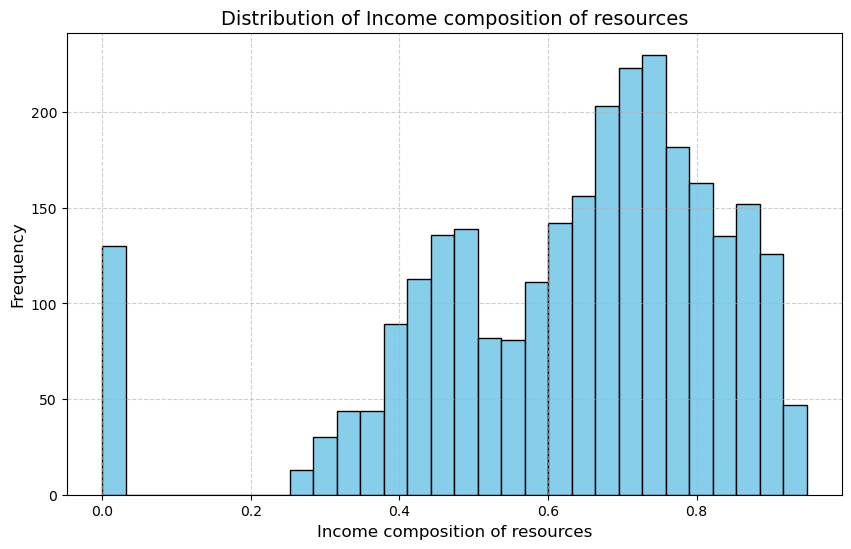

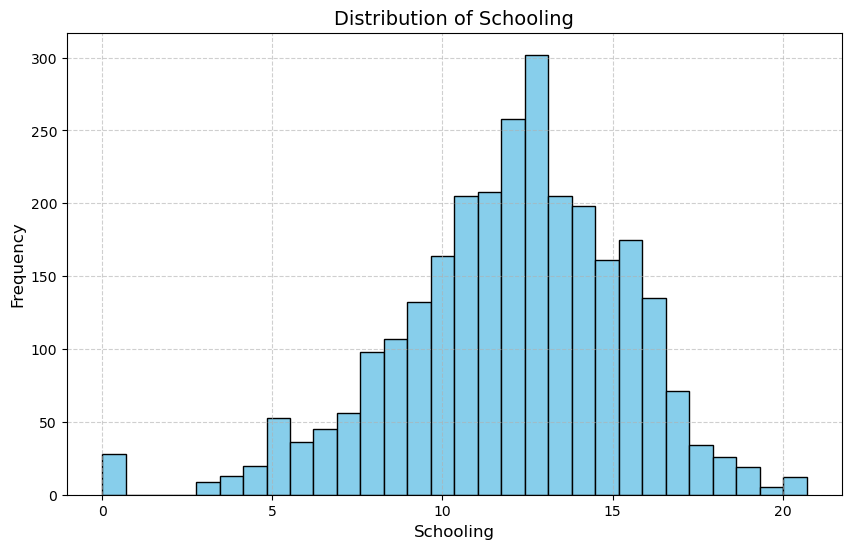

In [304]:
# Histogram to understand the data

for col in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6) 
    plt.show()

## This histogram displays the skewness in the datasets

Shape: The histogram has a noticeable peak between the 0.5 and 0.8 segments, indicating that a large number of observations fall within this range.

Skewness:

The distribution shows a slight right skew (positively skewed). This means that there are more values concentrated toward the lower end (0.0 to 0.5) and fewer observations at the higher end (0.8 to 1.0).
Although there's a pronounced peak towards the upper middle range, the tail on the right side is longer, indicating that some higher values aren't as frequent but still present.

# Let's check the outlier present in the data

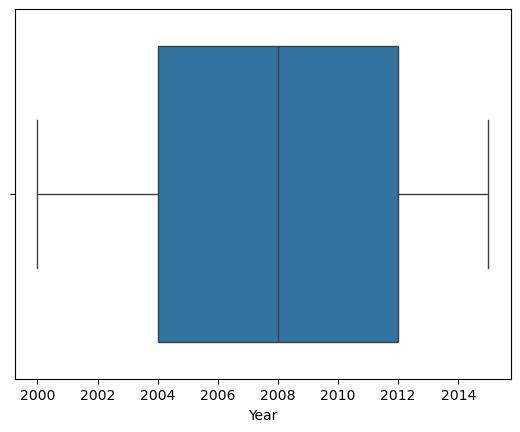

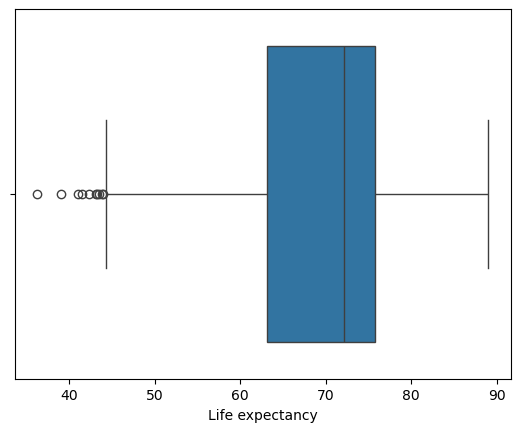

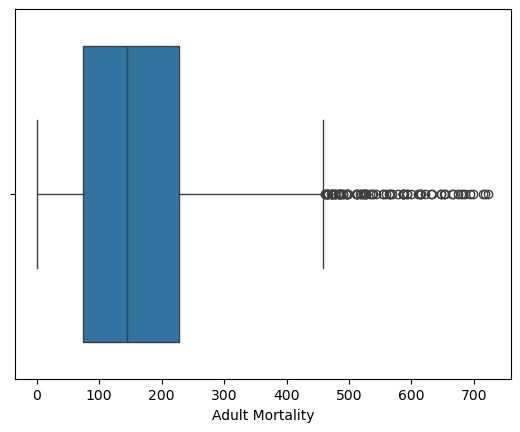

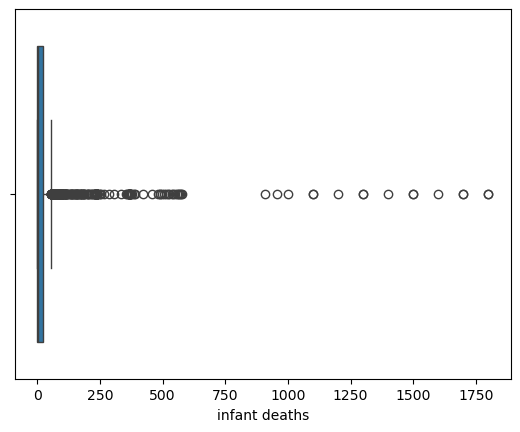

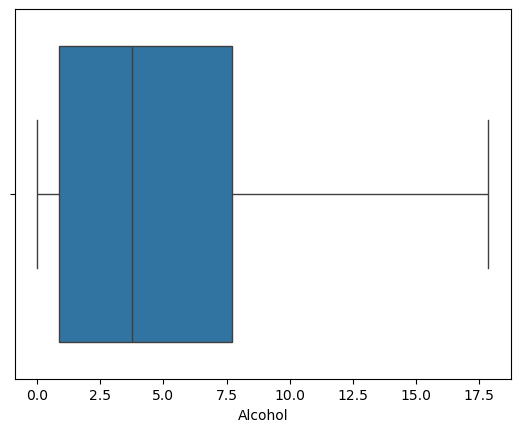

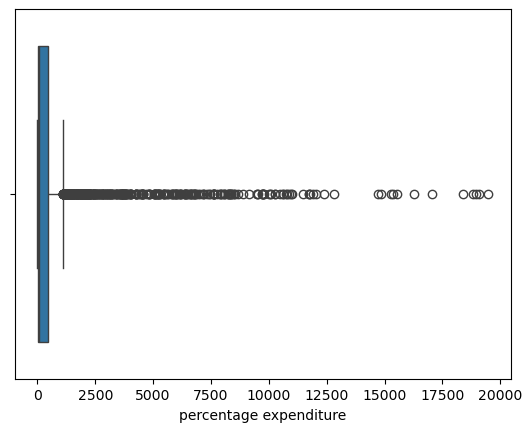

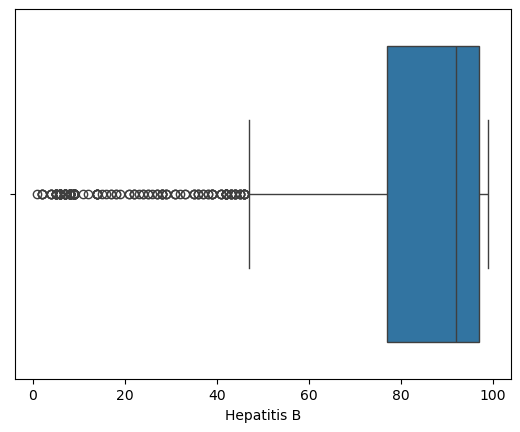

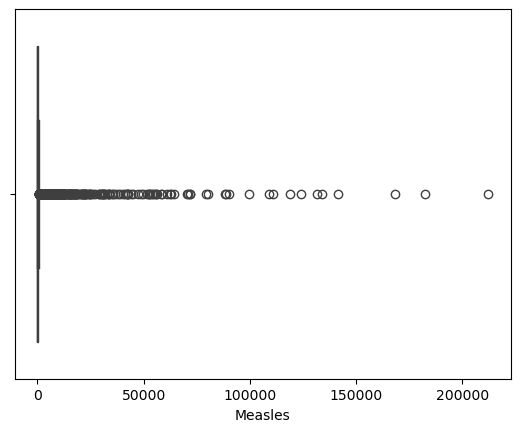

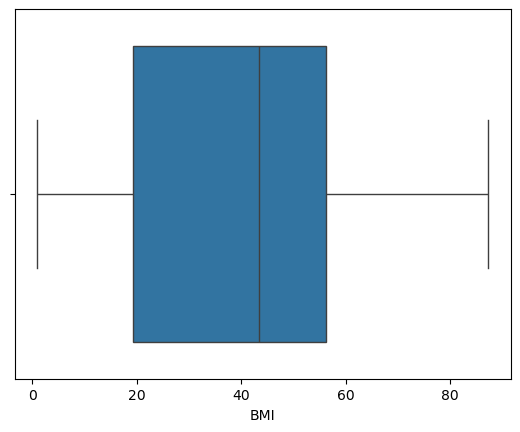

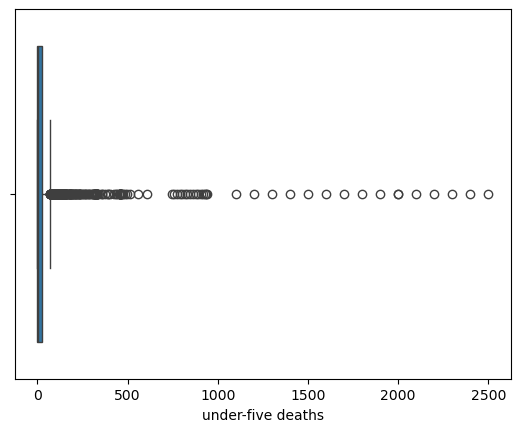

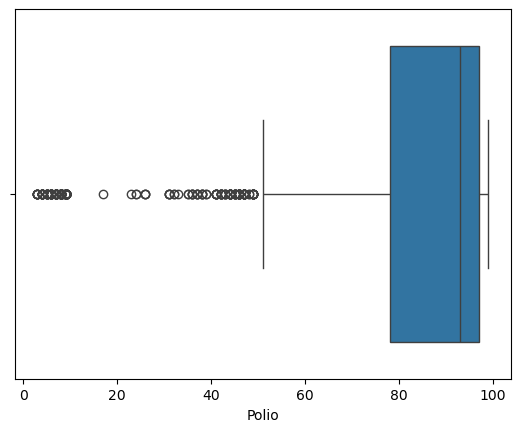

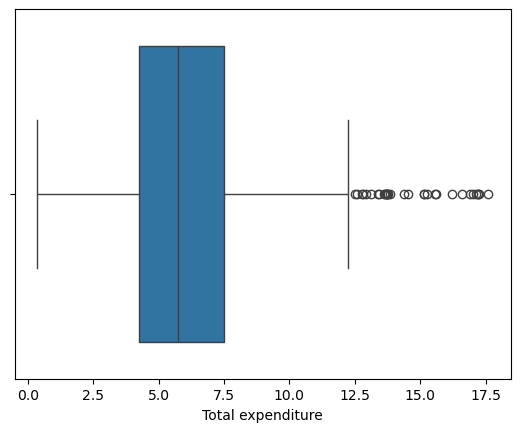

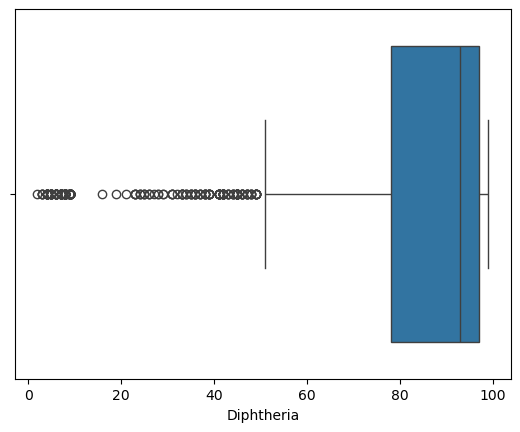

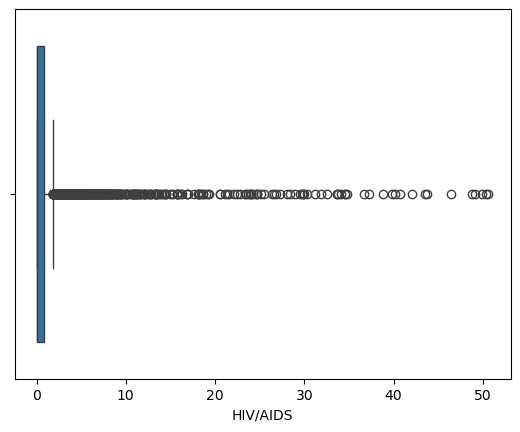

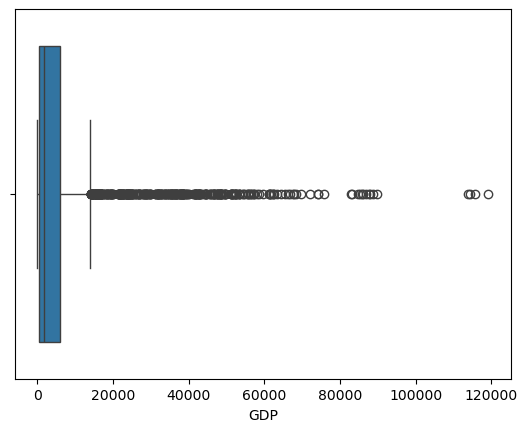

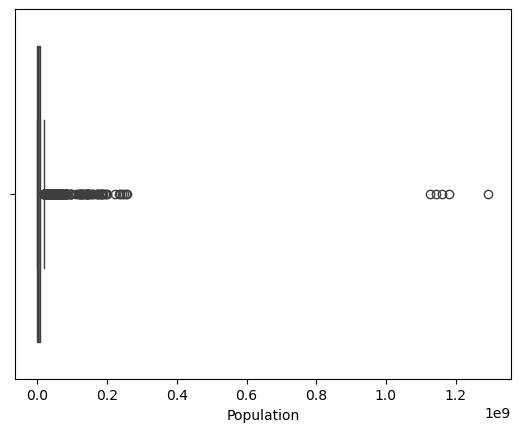

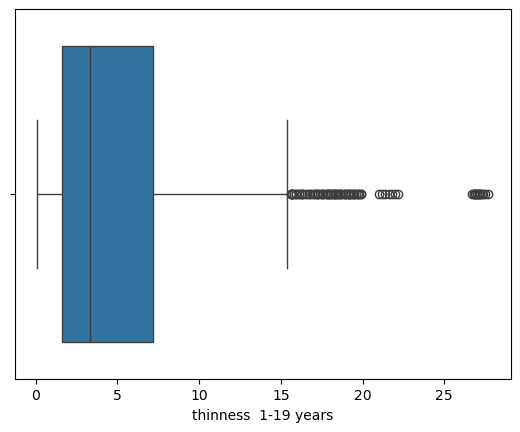

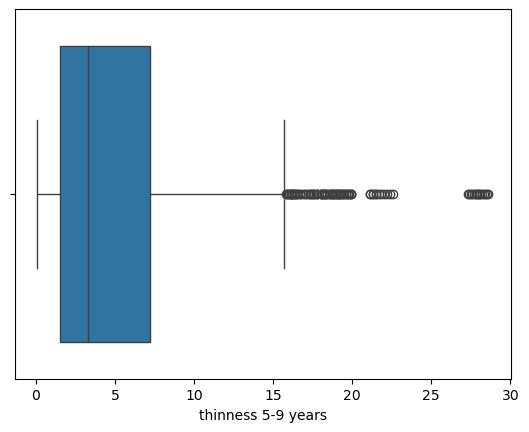

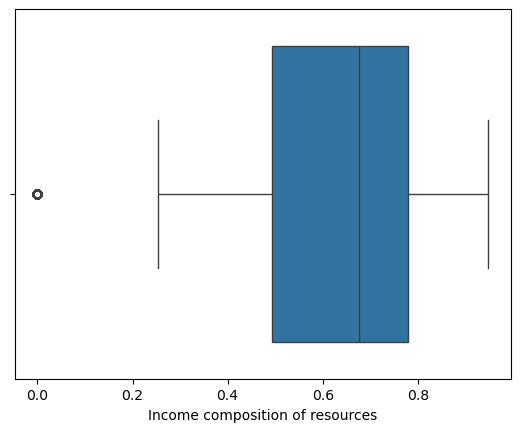

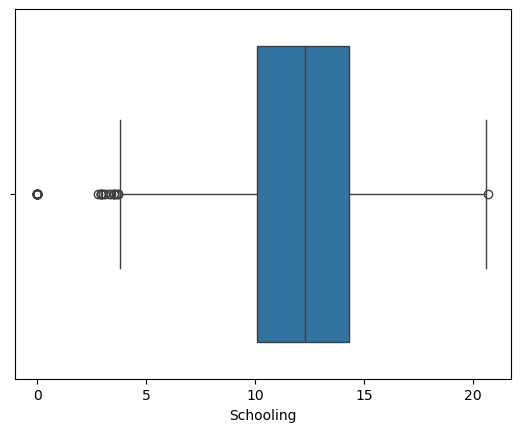

In [307]:
# Box plot to check for the outliers
# for i - it means, each and everything from the dataset


for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

## Outlier Analysis

- Year: This column has no outliers.
- Life Expectancy: This column has outliers on the lower side.
- Adult Mortality: This column has outliers more on the higher side.
- Infant Deaths: This column has major outliers.
- Alcohol: This column has outliers.
- Percentage Expenditure: This column has outliers.
- BMI: This column has no significant outliers.
- Polio: This column has no significant outliers.
- Total Expenditure: This column has outliers.
- Diphtheria: This column has no significant outliers.
- GDP: This column has outliers on both the lower and higher sides.
- Population: This column has significant outliers.
- Thinness 1-19 Years: This column has no significant outliers.
- Thinness 5-9 Years: This column has no significant outliers.
- Income Composition of Resources: This column has minimal outliers.
- Schooling: This column has minimal outliers.

*Note*: The presence of outliers was identified using box plots, highlighting extreme values that may affect analysis and modeling.


In [309]:
df.select_dtypes(include='number').corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


## Correlation Insights

- *Year* shows weak correlation with all other columns.
- *Life expectancy* has a strong positive correlation with Schooling (0.75) and Income composition of resources (0.72).
- *Adult Mortality* has a strong negative correlation with Life expectancy (-0.69).
- *infant deaths* and *under-five deaths* have almost perfect positive correlation (0.99), indicating redundancy.
- *Alcohol* shows moderate positive correlation with Life expectancy (0.40).
- *BMI* has a moderate positive correlation with Life expectancy (0.57).
- *GDP* is highly correlated with percentage expenditure (0.89).
- *thinness 1-19 years* and *thinness 5-9 years* are highly correlated (0.94), suggesting similarity.
- *Income composition of resources* is strongly correlated with Schooling (0.80).


# Correlation Heatmap

<Axes: >

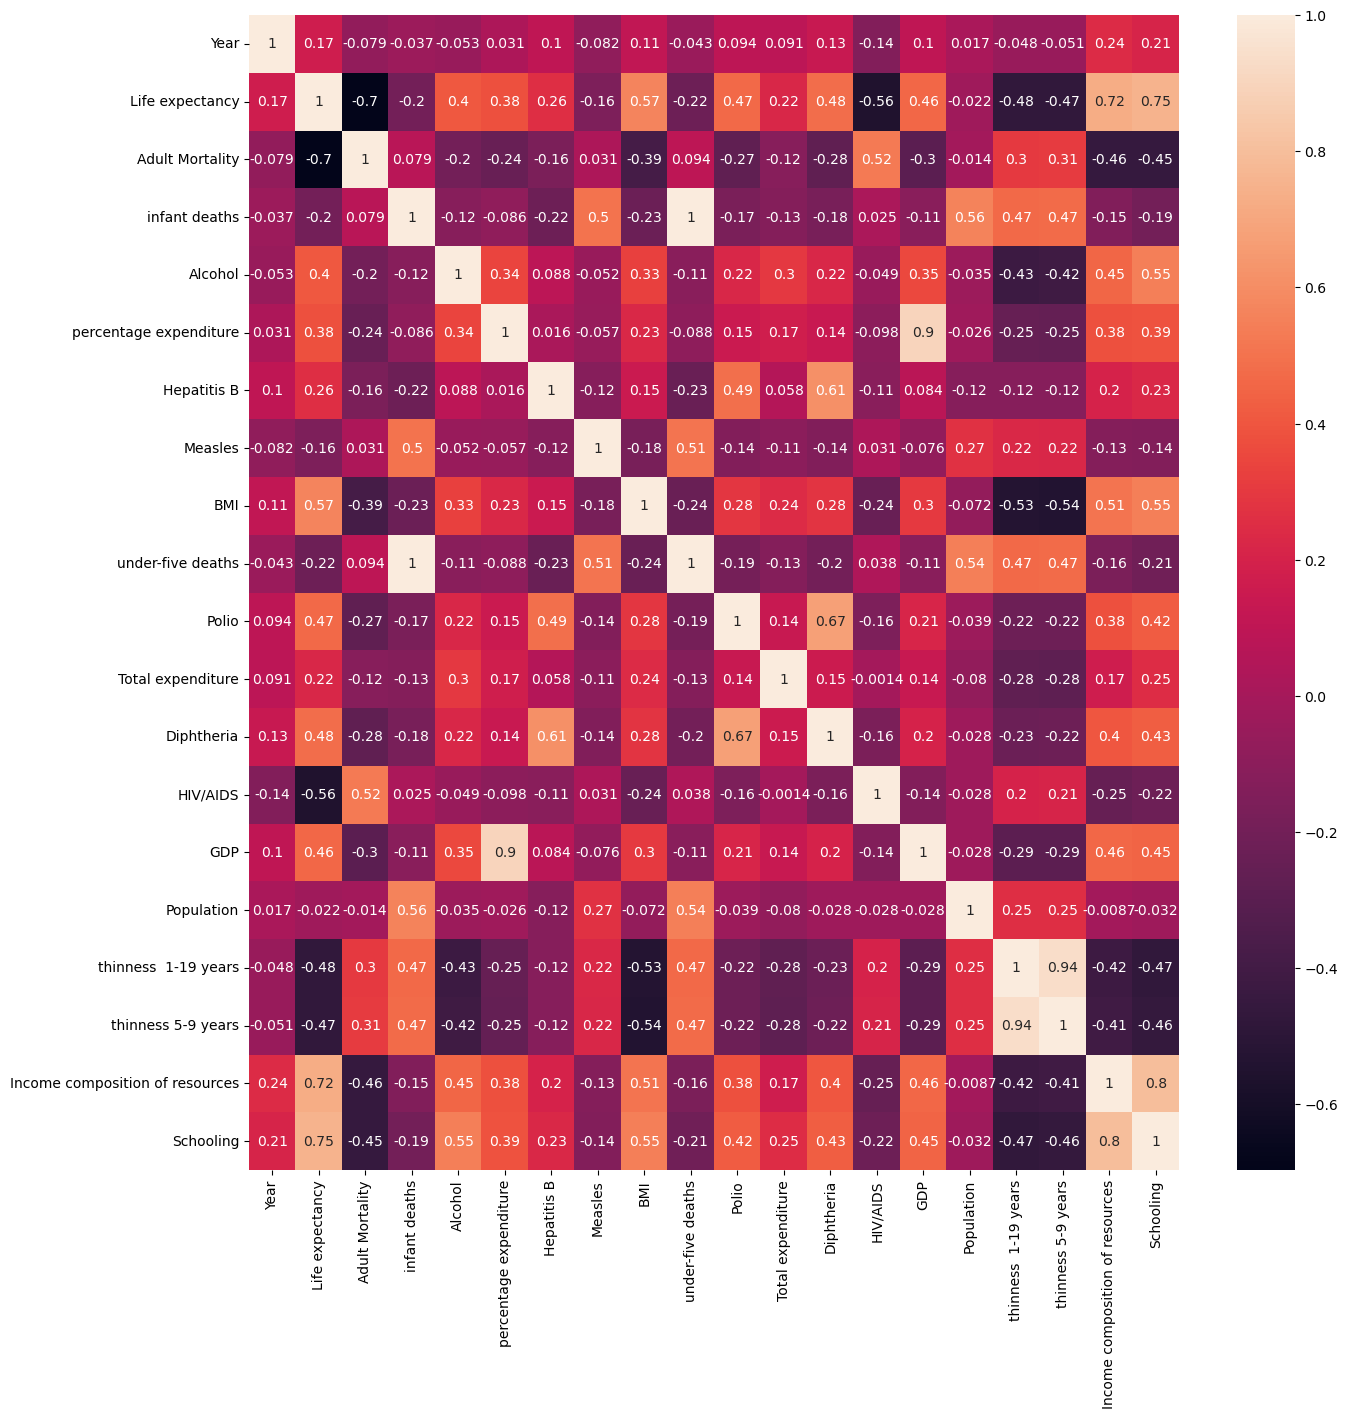

In [312]:
# Correlation matrix using the heatmap
s=df.select_dtypes(include='number').corr()
plt.figure(figsize = (15,15))
sns.heatmap(s,annot=True)

# Handling Missing Values and Outliers

In [314]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

## Importance of Life Expectancy Column

- **Why Life Expectancy is Important**:
  - Life expectancy is the **target variable** in the analysis, representing the primary outcome we aim to predict or understand.
  - It provides key insights into the overall health, quality of life, and development of populations across countries.
  - Many other variables in the dataset (e.g., GDP, healthcare expenditure, schooling) are analyzed in relation to their impact on life expectancy.

In [316]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

### Missing Values Handling

In this analysis, we are addressing missing values using a two-step approach:

1. **Categorical Columns**:
   - Missing values in categorical columns (e.g., `Country`, `Status`) are imputed using the **mode**, which represents the most frequent value in the column.
   - This method ensures that the imputed values are meaningful and consistent with the existing data distribution.

2. **Numerical Columns**:
   - Missing values in numerical columns are imputed using the **KNNImputer**, which fills missing values based on the mean values of the `k` nearest neighbors in the dataset.
   - The `KNNImputer` is particularly useful for maintaining relationships between features during imputation.


### Outlier Treatment

To handle outliers in the dataset, we use the **Interquartile Range (IQR) method**:

1. **Detection**:
   - The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of a feature.
   - Outliers are identified as values lying below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.

2. **Treatment**:
   - Outliers are capped to the lower and upper boundaries (`Q1 - 1.5 * IQR` and `Q3 + 1.5 * IQR`, respectively).
   - This approach retains all data points while reducing the impact of extreme values on the analysis.


In [319]:
df.columns = df.columns.str.strip()  # Strip extra spaces from column names

In [320]:
# Separate categorical and numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [321]:
# Handle missing values in categorical columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_28604\518062799.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





## Given the strong correlations in your dataset (e.g., 'Life expectancy', 'Schooling', 'Income composition of resources'), KNN Imputer othe best choice to maintain relationships and ensure data consistency.

In [323]:
# Uploading package for handling the outlier
from sklearn.impute import KNNImputer

In [324]:
# Apply KNNImputer only to numerical columns
imputer = KNNImputer()
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [325]:
# Detecting Outliers using IQR
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with boundaries
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

## Lets, check the missing values are filled

In [327]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

## As, we can see the missing values are completely filled

## Outlier treatment check

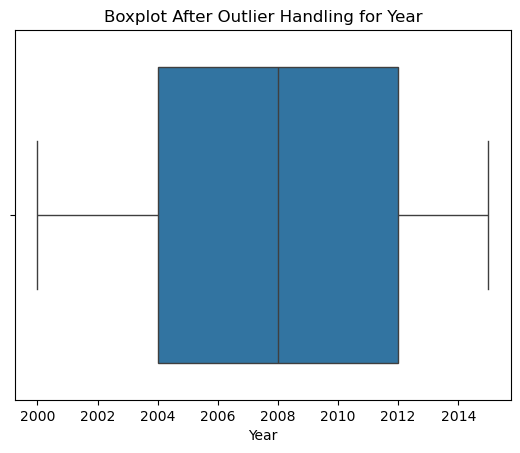

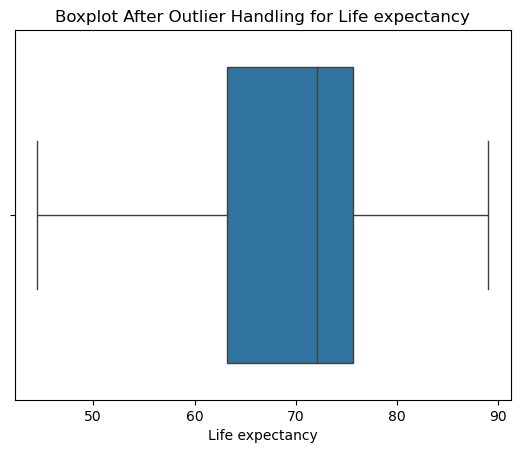

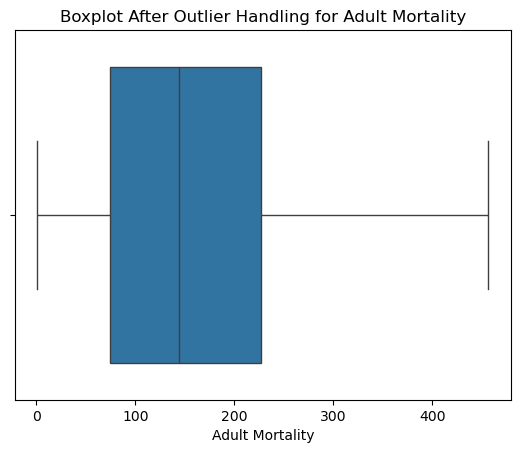

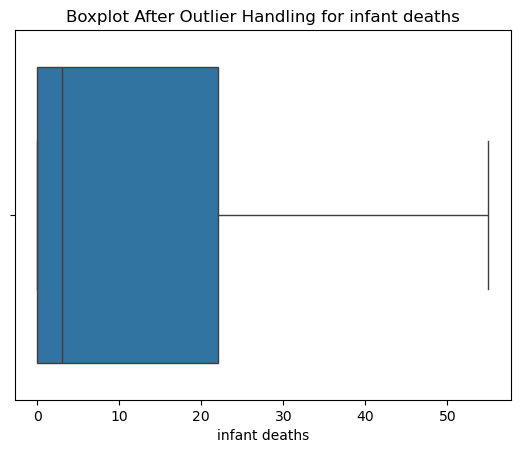

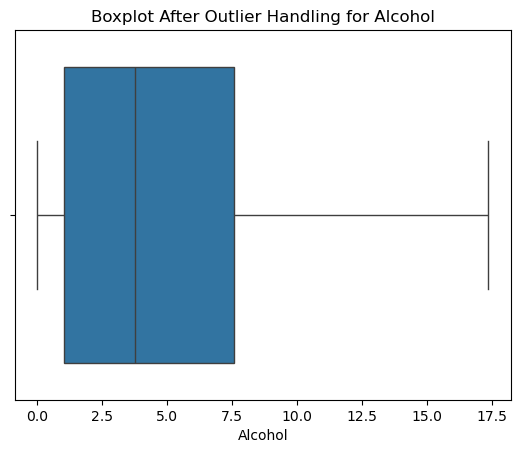

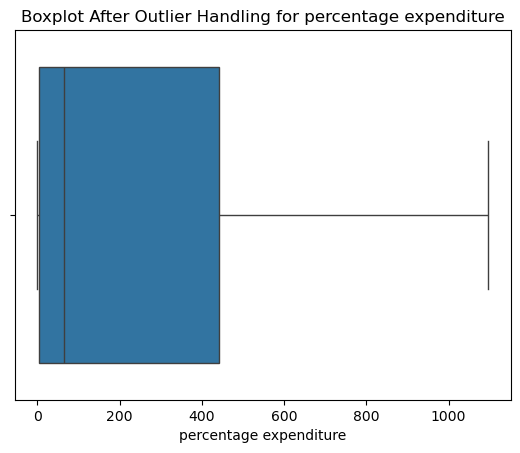

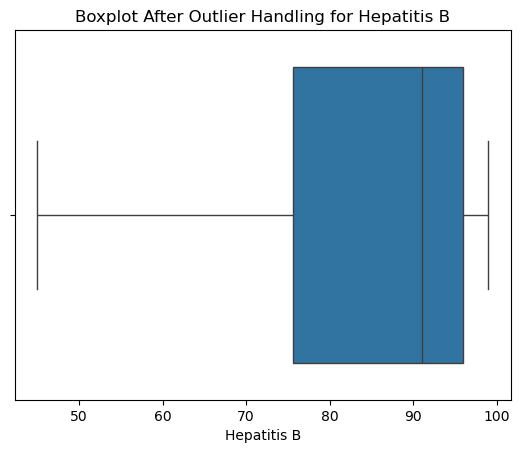

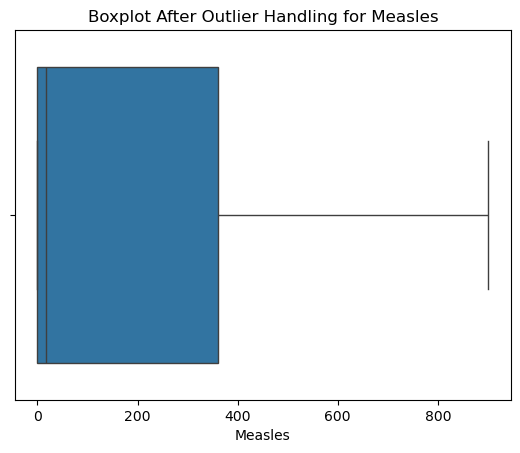

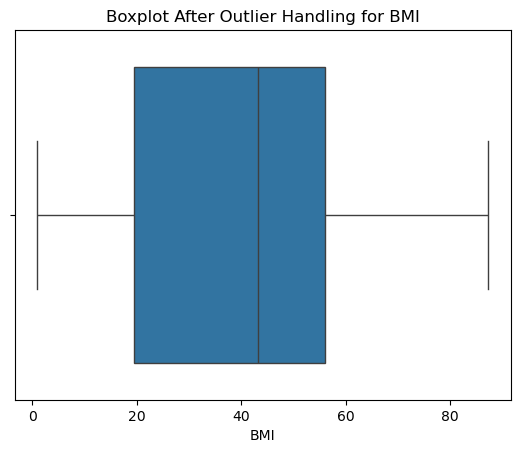

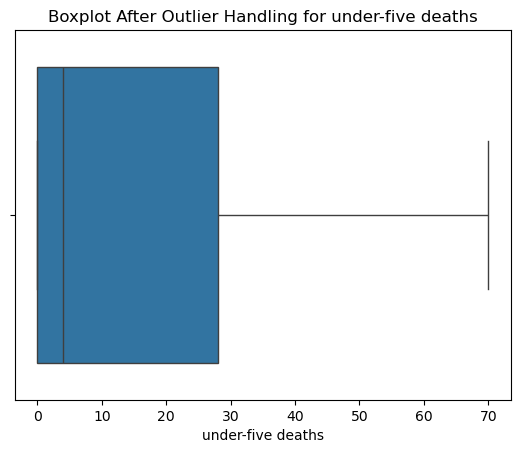

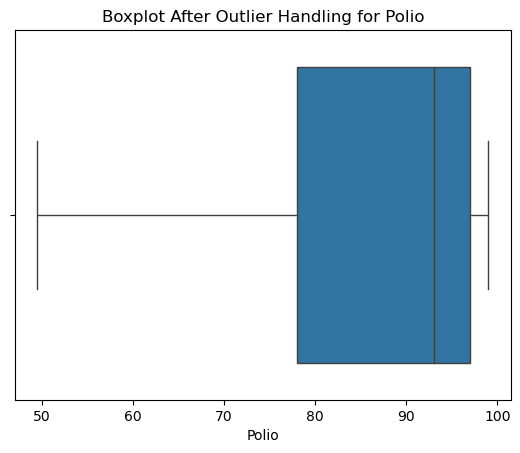

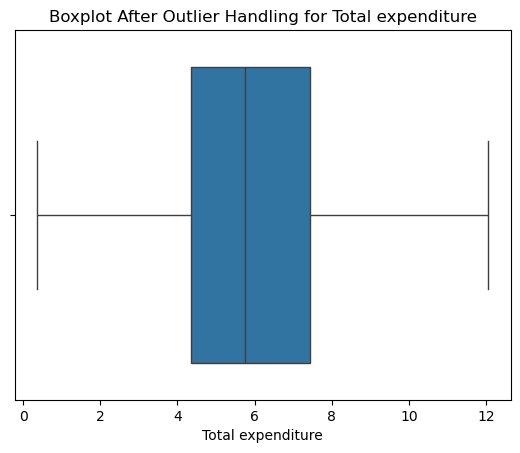

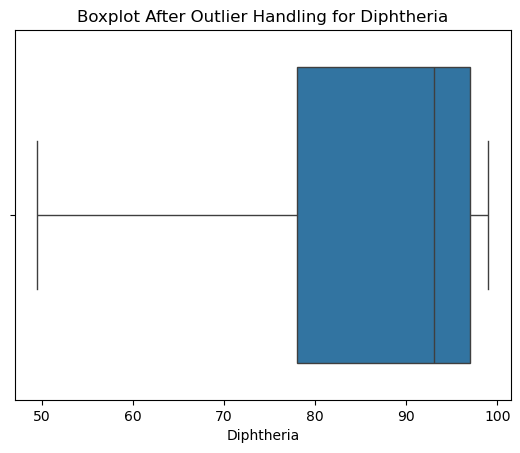

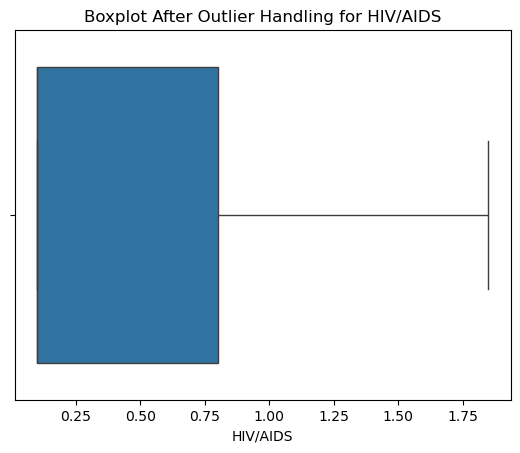

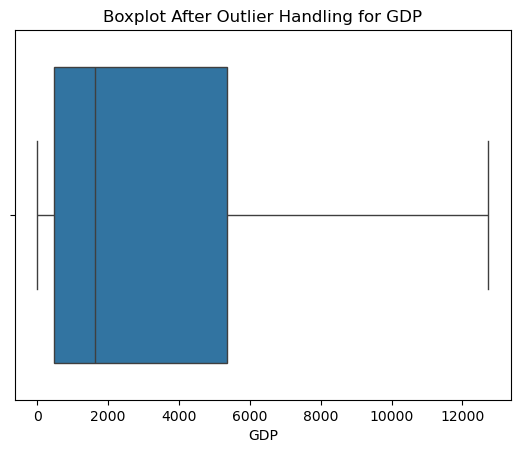

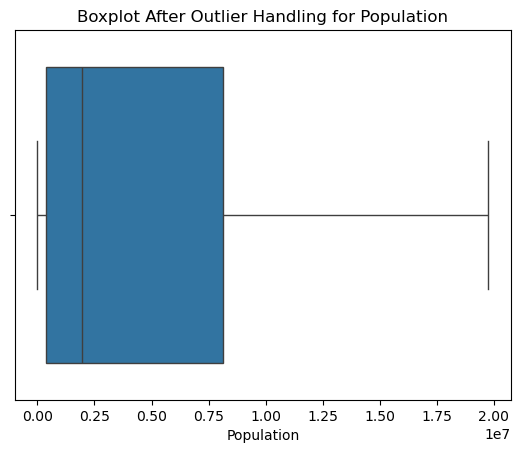

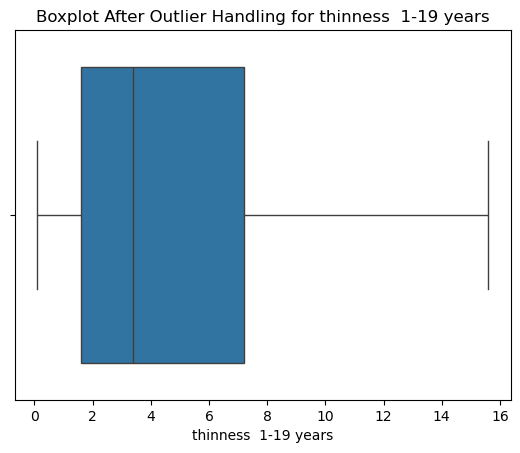

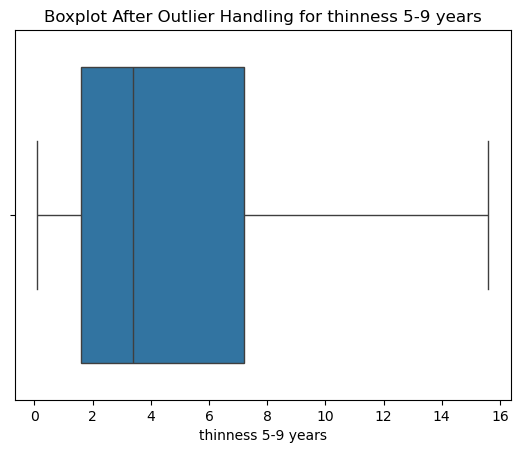

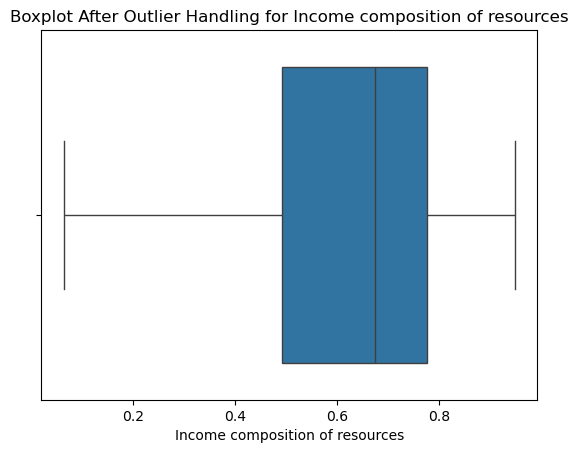

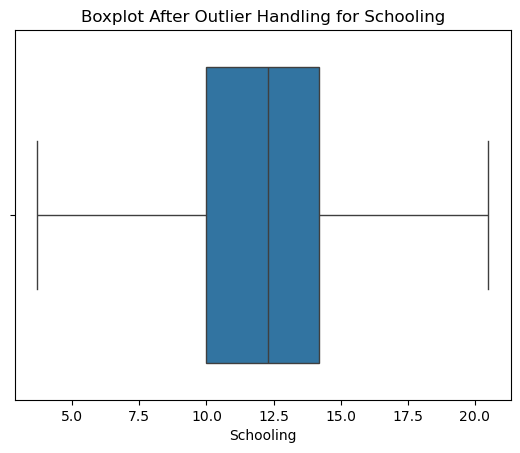

In [330]:
# Verify that outliers have been capped
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot After Outlier Handling for {col}")
    plt.show()

# Missing Value Imputation and Outlier Treatment

## Objective
The purpose of this step is to address missing values and outliers in the dataset to ensure data quality and reliability for analysis. Missing values and outliers can distort statistical measures, visualizations, and the performance of machine learning models.

## 1. Missing Value Imputation

### Categorical Columns:
* Missing values in categorical columns (e.g., `Country`, `Status`) were imputed using the **mode**.
* The mode represents the most frequently occurring value in a column, ensuring the imputed values align with the existing data distribution.

#### Why Mode?
* Mode imputation is simple and effective for categorical data, as it fills missing values with the most likely category without introducing noise.

### Numerical Columns:
* Missing values in numerical columns were imputed using the **K-Nearest Neighbors (KNN) Imputer**.
* This method estimates missing values based on the average of the `k` nearest data points, preserving the relationships and patterns within the data.

#### Why KNN Imputer?
* KNN Imputer is particularly useful when numerical features have strong correlations or dependencies.
* It considers the similarity between data points, resulting in more realistic imputations compared to static methods like mean or median.

---

## 2. Outlier Detection and Treatment

### Detection:
* Outliers in numerical columns were identified using the **Interquartile Range (IQR) Method**:
  * **Lower Bound** = Q1 - 1.5 * IQR
  * **Upper Bound** = Q3 + 1.5 * IQR
  * Here, Q1 and Q3 represent the 25th and 75th percentiles, respectively, and IQR = Q3 - Q1.

### Treatment:
* Values below the lower bound were capped at the lower bound.
* Values above the upper bound were capped at the upper bound.
* This approach reduces the influence of extreme values while retaining all data points.

---

## Visual Analysis

### Before Treatment:
* Boxplots showed extreme outliers in numerical columns, such as `Adult Mortality`.
* These outliers could bias results and negatively impact model performance.

### After Treatment:
* Post-treatment boxplots demonstrate that outliers were capped within the acceptable range, preserving the overall distribution of the data.

---

## Why Is This Approach Effective?

### Categorical Imputation with Mode:
* Maintains the integrity of categorical data by reflecting the most likely categories.

### Numerical Imputation with KNN:
* Leverages relationships between data points for realistic imputation, especially when features are interrelated.

### Outlier Treatment with IQR:
* Reduces the impact of extreme values without discarding data points, ensuring robust statistical analysis.

---

This comprehensive preprocessing approach enhances data quality, ensures consistency across numerical and categorical columns, and prepares the dataset for further exploratory analysis and modeling.


# Visualization

# Purpose of this Pairplot
**The purpose of this pairplot in the project is to explore how Life Expectancy, GDP, and Adult Mortality relate to one another, helping identify patterns and correlations between economic and health factors. It provides insights into how wealth and mortality impact the overall health outcomes of a population.**

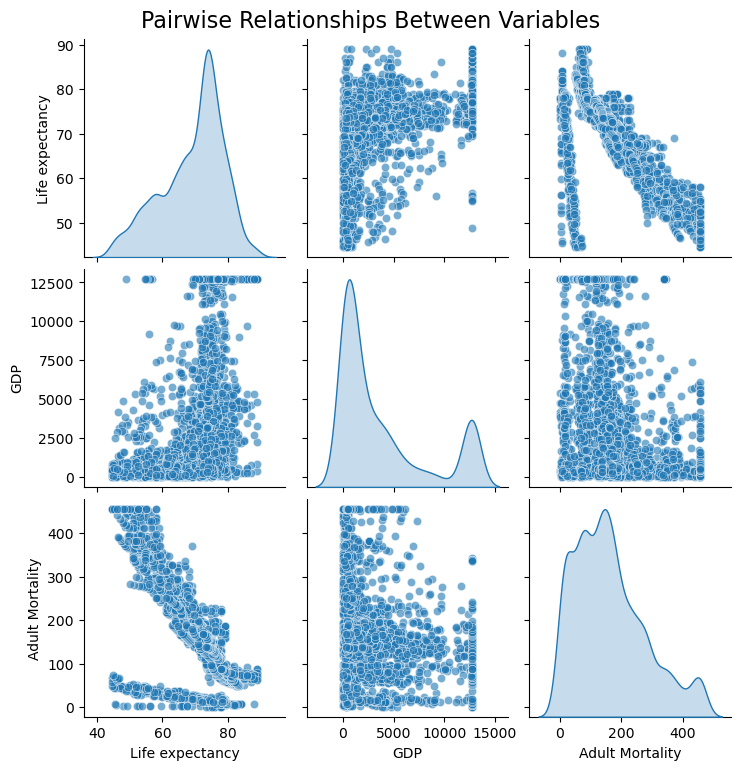

In [334]:
# Creating a Pair Plot to explore pairwise relationships

# columns for the pair plot
columns_for_pairplot = ['Life expectancy', 'GDP', 'Adult Mortality']

# Pair Plot
sns.pairplot(df[columns_for_pairplot], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships Between Variables', y=1.02, fontsize=16)  # Adding a title
plt.show()

# Explanation for the above Pairplot

# Pairwise Relationships

## Life Expectancy vs. GDP:
- **There’s a positive trend:** Higher GDP generally correlates with higher life expectancy.
- The scatterplot indicates that countries with low GDP tend to have shorter life spans, whereas wealthier nations exhibit longer life expectancy.
- A few outliers have low life expectancy despite moderate GDP.

## Life Expectancy vs. Adult Mortality:
- **Strong negative correlation:** As adult mortality increases, life expectancy decreases significantly.
- Countries with high mortality rates have lower life expectancy, likely reflecting poorer healthcare systems or living conditions.

## GDP vs. Adult Mortality:
- **Negative correlation:** Higher GDP is generally associated with lower adult mortality.
- Countries with low GDP have wide variability in mortality rates, while wealthier countries consistently exhibit lower mortality.

## Key Insights:
- **Economic Impact:** GDP is a strong predictor of health outcomes (both life expectancy and adult mortality). Wealthier countries tend to have better healthcare infrastructure, which improves life expectancy and reduces mortality rates.
- **Healthcare Challenges in Low GDP Nations:** Countries with low GDP and high adult mortality represent potential areas for focused health and economic development.
- **Outliers:** There are notable outliers in all relationships, warranting further exploration (e.g., countries with high GDP but lower life expectancy or low GDP and lower-than-expected mortality).



 # Purpose of this scatterplot
 **The scatter plots visualize relationships between life expectancy and key factors like GDP and percentage expenditure, making it easier to identify trends, correlations, and outliers. These visualizations highlight how economic and health spending impact global health outcomes, offering actionable insights for policymakers.**

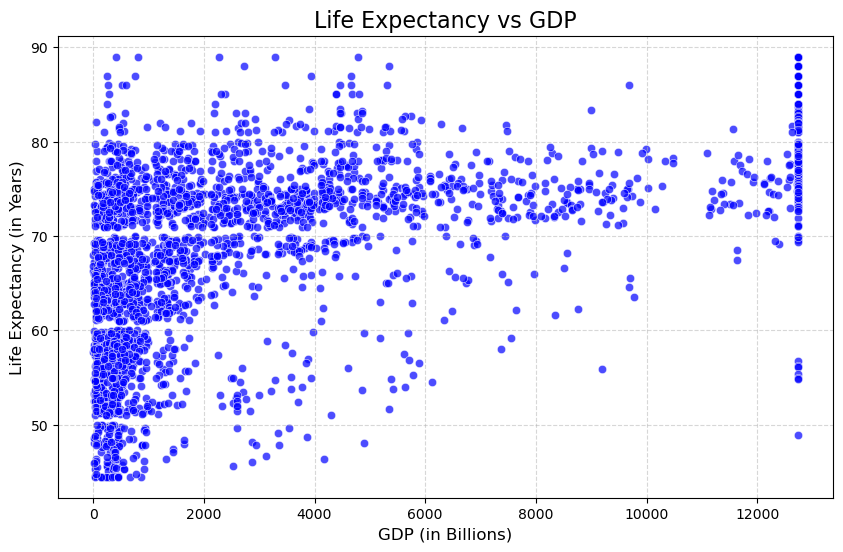

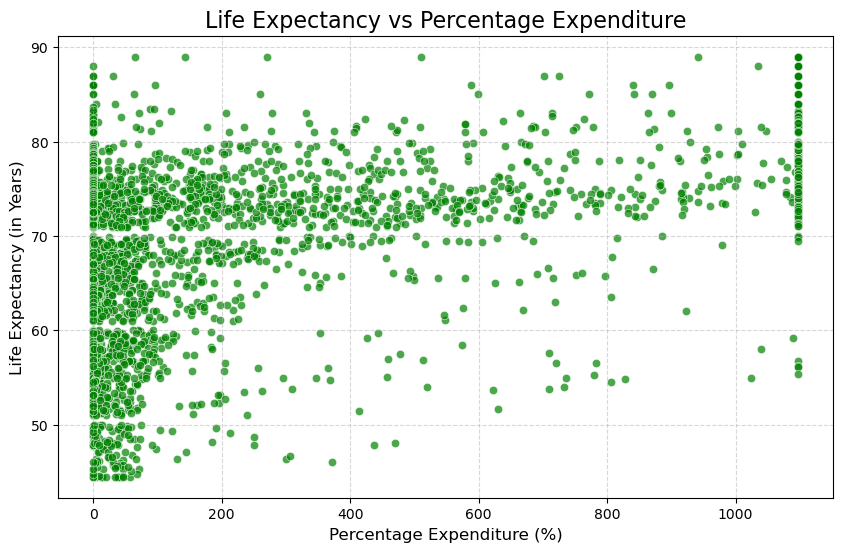

In [339]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy', data=df, color='blue', alpha=0.7)
plt.title('Life Expectancy vs GDP', fontsize=16)
plt.xlabel('GDP (in Billions)', fontsize=12)
plt.ylabel('Life Expectancy (in Years)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Scatter Plot: Life Expectancy vs Percentage Expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='percentage expenditure', y='Life expectancy', data=df, color='green', alpha=0.7)
plt.title('Life Expectancy vs Percentage Expenditure', fontsize=16)
plt.xlabel('Percentage Expenditure (%)', fontsize=12)
plt.ylabel('Life Expectancy (in Years)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Explanation of the Scatter Plot: Life Expectancy vs. GDP
- This scatter plot illustrates the relationship between Life Expectancy (Y-axis) and GDP (Gross Domestic Product, X-axis) across various countries. Each point represents a country, with its GDP on the horizontal axis and life expectancy on the vertical axis.

## Key Observations:
- **Positive Correlation:**
The general trend shows that as GDP increases, life expectancy tends to rise.
Wealthier countries (higher GDP) tend to have longer life expectancy, reflecting better healthcare systems, infrastructure, and living standards.
- **Cluster of Low GDP Nations:**
A significant cluster of countries is found at the lower GDP range (< 10,000) with varied life expectancies ranging from 40 to 80 years. 
This indicates a wide disparity in health outcomes among poorer nations, possibly due to differences in healthcare policies or socioeconomic conditions.
## Insights for Policymakers:
- **Economic Growth Matters:**
Higher GDP generally contributes to longer life expectancy, highlighting the importance of economic development.
- **Focus on Efficiency:** Wealthier nations should focus on improving healthcare efficiency and 
addressing non-economic factors to further extend life expectancy.

# Explanation of the Scatter Plot: Life Expectancy vs Percentage Expenditure
This scatter plot explores the relationship between Life Expectancy (Y-axis) and Percentage Expenditure on Healthcare (X-axis) across various countries. Each point represents a country, with its healthcare expenditure as a percentage of GDP on the horizontal axis and life expectancy on the vertical axis.

## Key Observations:
- **Clustered Data at Low Expenditure:**
Most countries have low healthcare expenditure as a percentage of GDP (< 2,500%). These countries exhibit a wide range of life expectancy, spanning from around 40 to 85 years.
- **Positive Correlation at Higher Expenditures:**
At moderate-to-high healthcare expenditure (between 2,500% and 10,000%), life expectancy tends to stabilize around 70-85 years, showing a generally positive relationship.
- **Low Expenditure with High Life Expectancy:**
Some countries achieve high life expectancy (> 70 years) despite low healthcare expenditure.

## Insights for Policymakers:
- **Invest in Healthcare:**
Increasing healthcare expenditure is generally associated with longer life expectancy, especially in countries with low or moderate spending.
- **Focus on Efficiency:**
Countries with high healthcare expenditure but only marginal improvements in life expectancy may need to optimize healthcare delivery.

# Purpose of this line plot
 **The line plot showcases changes in average life expectancy over the years, comparing developed and developing countries. This visualization highlights how development status influences health outcomes, providing actionable insights for policymakers to address disparities and improve global life expectancy.**

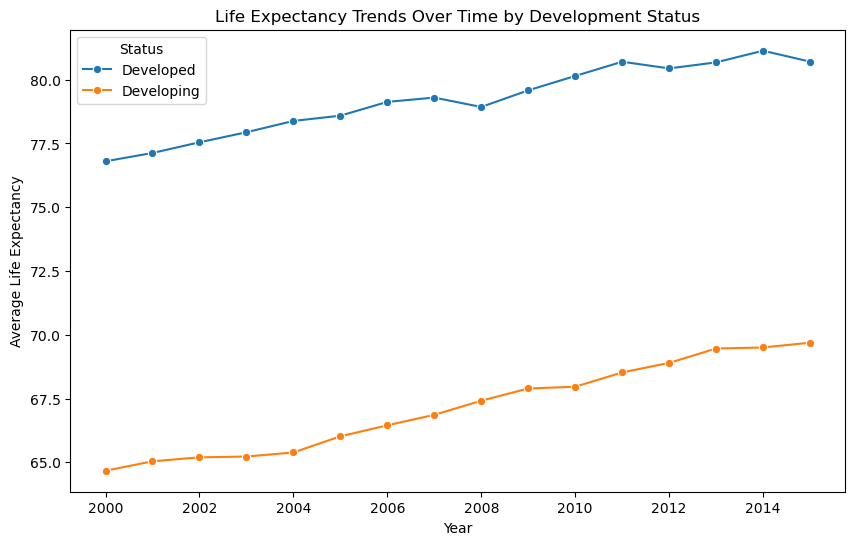

In [346]:
# Line plot for life expectancy trends over time
plt.figure(figsize=(10, 6))
life_expectancy_over_time = df.groupby(['Year', 'Status'])['Life expectancy'].mean().reset_index()
sns.lineplot(x='Year', y='Life expectancy', hue='Status', data=life_expectancy_over_time, marker='o', palette='tab10')
plt.title('Life Expectancy Trends Over Time by Development Status')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.legend(title='Status')
plt.show()

# Explanation of the Line Plot: Life Expectancy vs. Year
- This line plot shows the trend in average life expectancy (Y-axis) over time (X-axis) for developed and developing countries. The two lines represent the differences between these groups, highlighting how life expectancy has improved over the years and how development status impacts health outcomes.

## Key Observations:
- **Higher Life Expectancy in Developed Countries:**
The blue line (developed countries) consistently shows a higher life expectancy compared to the orange line (developing countries) across all years.
- **Steady Growth in Both Groups:**
Both lines demonstrate an upward trend, indicating that life expectancy has been improving over time for both developed and developing countries. 
- **Slower Progress in Developing Countries:**
The orange line for developing countries shows a slower rate of increase compared to the blue line.
## Insights for Policymakers:
- **Improve Healthcare in Developing Countries:**
Policymakers should focus on providing better healthcare services and resources to boost life expectancy in developing nations.
- **Maintain Progress in Developed Countries:** 
Developed nations should invest in preventive care and aging population support to sustain their high life expectancy.

# Purpose of this pie chart
 **This pie chart shows how life expectancy is distributed between high and low-income countries. It helps visualize the impact of income on life expectancy, highlighting differences between these groups.**

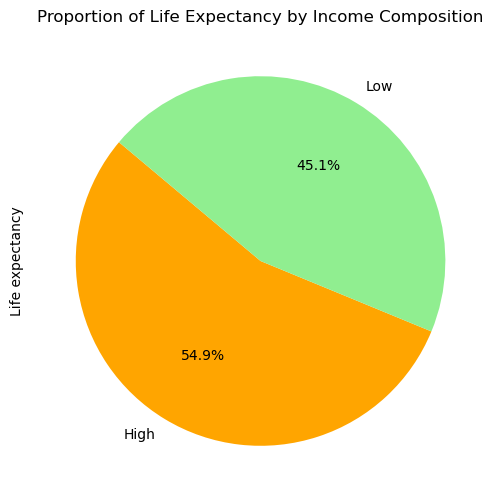

In [350]:
# Categorize countries by income composition - high and low
income_limit = df['Income composition of resources'].median() 
df['Income Group'] = 'Low'  
df.loc[df['Income composition of resources'] >= income_limit, 'Income Group'] = 'High'

# Calculate average life expectancy by income group
income_life_expectancy = df.groupby('Income Group')['Life expectancy'].mean()

# Plot the pie chart
plt.figure(figsize=(8, 6))
income_life_expectancy.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=["orange", "lightgreen"])
plt.title('Proportion of Life Expectancy by Income Composition')
plt.show()

# Explanation of the Pie Chart
- The pie chart shows the distribution of life expectancy between high-income and low-income countries, with green representing low-income countries and orange representing high-income countries.

## Key Observations:
- **Higher Life Expectancy in High-Income Countries:**
The orange section (high-income) represents a larger proportion of life expectancy with 54.5%, indicating better health outcomes in wealthier nations.
- **Lower Life Expectancy in Low-Income Countries:**
The green section (low-income) shows a smaller share of life expectancy with 45.5%, highlighting the health challenges faced by poorer nations.
## Insights for Policymakers:
- **Focus on Reducing Disparities:**
Policymakers should work towards improving healthcare and resources in low-income countries to reduce the life expectancy gap.
- **Sustain Progress in Wealthier Nations:** 
In high-income countries, efforts should be made to maintain or further improve healthcare systems to ensure continued high life expectancy.

# Purpose of this Horizontal chart

**This chart aims to identify and highlight the top 10 countries in terms of life expectancy, showcasing global leaders in health outcomes.**


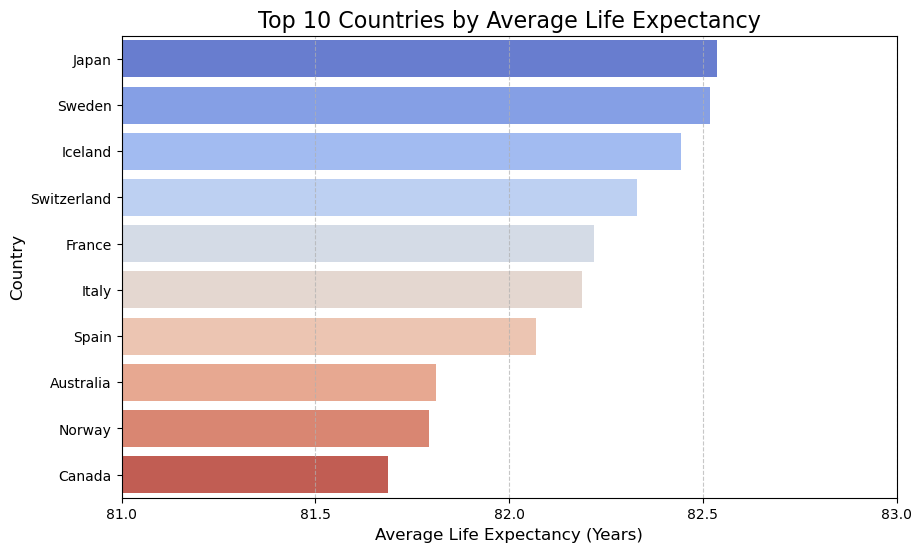

In [354]:
# Horizontal Bar Chart: Top 10 Countries by Average Life Expectancy

# Grouping the data to find the top 10 countries with the highest life expectancy
top_countries = df.groupby('Country')['Life expectancy'].mean().nlargest(10).reset_index()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_countries,
    x='Life expectancy',
    y='Country',
    hue='Country', 
    palette='coolwarm',
    dodge=False, 
    legend=False )
plt.title('Top 10 Countries by Average Life Expectancy', fontsize=16)
plt.xlabel('Average Life Expectancy (Years)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Set x-axis range and ticks
plt.xlim(81, 83)
plt.xticks(ticks=[81, 81.5, 82, 82.5, 83])  

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Explanation:
- This horizontal bar chart visualizes the top 10 countries with the highest average life expectancy, showcasing which nations lead in global health outcomes.

## Key Observations:
- **Japan Leads in Life Expectancy**:
  Japan has the highest life expectancy among all countries, closely followed by Sweden and Iceland.
- **Top-Performing Countries Are Developed**:
  All top-ranking countries are developed nations, reflecting their robust healthcare systems and high standards of living.
## Insights for Policymakers:
- **Study Best Practices in Leading Countries**:
  Developing countries can learn from the policies and practices of these top-performing nations to improve their healthcare systems.
- **Sustain High Standards**:
  Policymakers in these countries should continue investing in healthcare to maintain their global leadership in life expectancy.


# Purpose of the Vertical Bar Chart
- The chart compares **healthcare expenditure as a percentage of GDP** between developed and developing countries, highlighting disparities in healthcare investment.


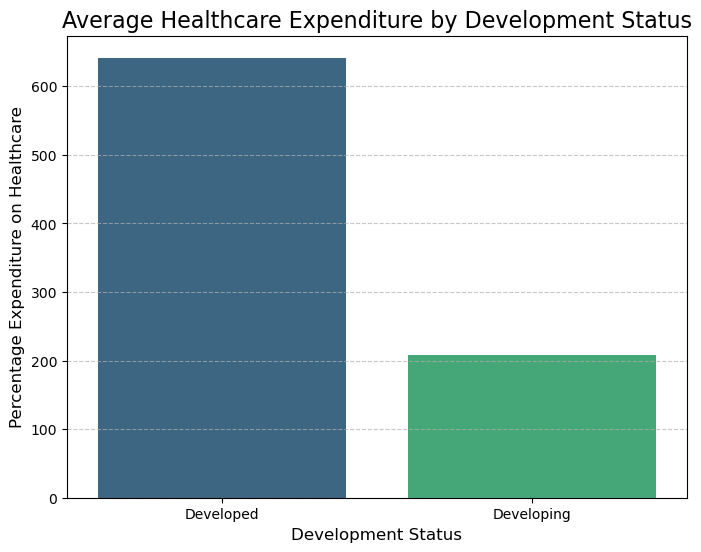

In [358]:
# Calculating the average percentage expenditure on healthcare by development status
healthcare_expenditure = df.groupby('Status')['percentage expenditure'].mean().reset_index()

# Plotting the vertical bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    data=healthcare_expenditure,
    x='Status',
    y='percentage expenditure',
    hue='Status',  
    palette='viridis',
    dodge=False,  
    legend=False 
)
plt.title('Average Healthcare Expenditure by Development Status', fontsize=16)
plt.xlabel('Development Status', fontsize=12)
plt.ylabel('Percentage Expenditure on Healthcare', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Explanation of the Vertical Bar Chart
- The vertical bar chart shows the average percentage of GDP spent on healthcare in developed and developing countries. It provides a clear comparison of healthcare investment by development status.


## Key Observations:
- **Higher Healthcare Spending in Developed Countries**:
  Developed countries allocate a significantly larger percentage of their GDP to healthcare compared to developing countries.
- **Developing Countries Lag Behind**:
  Developing nations spend much less on healthcare, which can hinder their ability to improve public health outcomes.

## Insights for Policymakers:
- **Increase Investment in Healthcare**:
  Developing countries should prioritize healthcare funding to improve life expectancy and reduce mortality rates.
- **Efficient Use of Resources in Developed Countries**:
  Developed countries should focus on optimizing healthcare expenditure to ensure long-term sustainability.


# Purpose of the Line Chart
- The chart visualizes **trends in adult mortality rates** (deaths per 1,000 adults) over time for developed and developing countries, showcasing progress or disparities in reducing mortality.


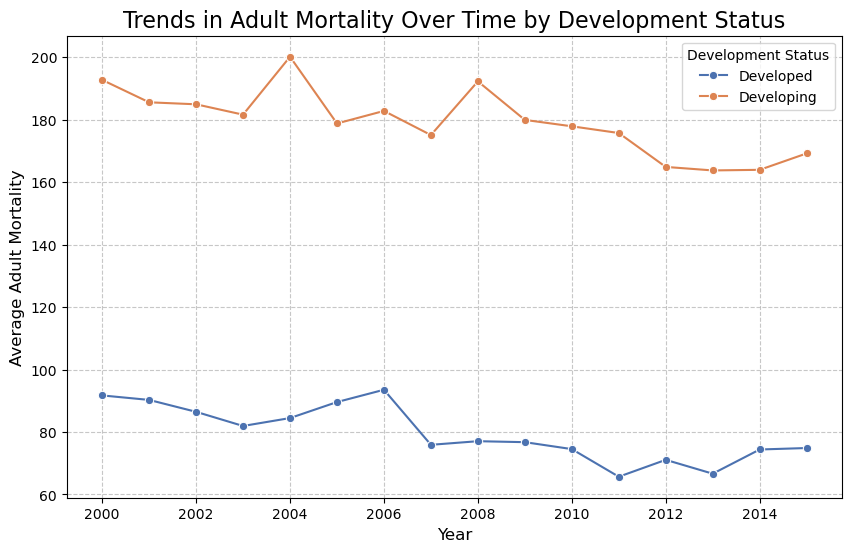

In [362]:
# Line Chart: Trends in Adult Mortality Over Time by Development Status

# Grouping the data to find trends in adult mortality over time
mortality_trends = df.groupby(['Year', 'Status'])['Adult Mortality'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=mortality_trends, x='Year', y='Adult Mortality', hue='Status', marker='o', palette='deep')
plt.title('Trends in Adult Mortality Over Time by Development Status', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Adult Mortality', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title='Development Status')
plt.show()

# Explanation of the Line Chart
- The line chart shows the average adult mortality rates for developed and developing countries over several years. Each line represents the trend for a specific development status, with markers to highlight key data points.


## Key Observations:
- **Higher Mortality in Developing Countries**:
  Developing countries have consistently higher adult mortality rates compared to developed countries.
- **Declining Trend in Mortality Rates**:
  Both developed and developing countries show a downward trend, indicating global improvements in healthcare and living conditions.

## Insights for Policymakers:
- **Focus on Reducing Mortality in Developing Countries**:
  Policymakers should prioritize healthcare interventions in developing countries to accelerate the decline in mortality rates.
- **Maintain Progress in Developed Countries**:
  Developed nations should continue investing in preventive care and managing chronic diseases to sustain their low mortality rates.


# Predictive Model 

------

# Purpose of this Scatter Chart:

**The scatterplot compares actual vs. predicted life expectancy values. The red diagonal line represents perfect predictions. Points close to the line indicate accurate predictions, while deviations show prediction errors.**

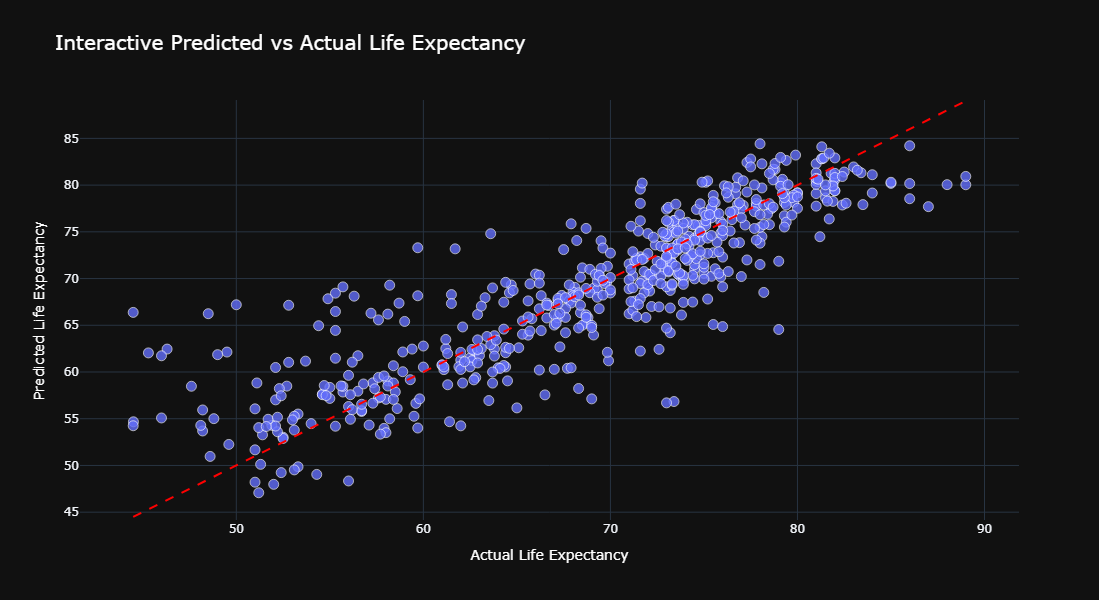

In [367]:
# Performing Regression Analysis and showcsing it using a scatter chart
# importing necesssary modules 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Selecting features and the target variable
X = df[['Schooling', 'Income composition of resources', 'Adult Mortality', 'BMI', 'GDP', 'Alcohol']]
y = df['Life expectancy']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Importing plotly
import plotly.express as px

# Creating a dataframe for plotly
plotly_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Country': df.loc[y_test.index, 'Country']
})

# Generating an interactive scatter plot
fig = px.scatter(
    plotly_df,
    x='Actual',
    y='Predicted',
    hover_name='Country',  # Show country name on hover
    title='Interactive Predicted vs Actual Life Expectancy',
    labels={'Actual': 'Actual Life Expectancy', 'Predicted': 'Predicted Life Expectancy'},
    template='plotly_white'
)

# Adding a diagonal line for predictions
fig.add_shape(
    type='line',
    x0=plotly_df['Actual'].min(),
    y0=plotly_df['Actual'].min(),
    x1=plotly_df['Actual'].max(),
    y1=plotly_df['Actual'].max(),
    line=dict(color='red', dash='dash')
)

# Updating the layout
fig.update_layout(
    template='plotly_dark',
    height=600,
    width=900,
    title_font=dict(size=20, color='white'),  # Adjust title font color
    xaxis=dict(title=dict(font=dict(color='white'))),  # Adjust x-axis title color
    yaxis=dict(title=dict(font=dict(color='white')))   # Adjust y-axis title color
)

# Adjusting marker properties for better clarity
fig.update_traces(
    marker=dict(
        size=10,  
        opacity=0.8,  
        line=dict(width=0.8, color='white') 
    )
)

# Displaying the plot
fig.show()

# Explanation of the scatter chart:
The scatter chart visualizes the relationship between actual and predicted life expectancy, allowing you to hover over each dot to show individual country information.

# Key Observations:

**1. Model Performance:** The R² Score (0.73) indicates that the model explains about 73% of the variance within life expectancy, which is quite strong.
The Root Mean Squared Error (RMSE) of 4.81 tells us that the average prediction error is around 4.81 years, which is withing the margin of error for our analysis.

**2. Predicted vs. Actual Trend:** We see the points generally align along the red diagonal line, showing that the model predicts life expectancy well for most countries. However, there are some outliers (points far from the line) where the predicted life expectancy deviates significantly from the actual value. These outliers could indicate countries with unique conditions which might need to look into.

**3. Feature Importance:** The income composition of resources has the highest positive coefficient (9.16), indicating its strong influence on life expectancy. Schooling is the second most impactful factor, telling us how important of a role education has in improving health outcomes. Adult Mortality has a negative coefficient (-0.03), highlighting its adverse effect on life expectancy which makes sense.
 
**4. Cluster of Points:** A dense cluster of points around the 60-80 life expectancy range suggests that most countries fall within this range, with relatively small prediction errors. The spread does widens at the lower end (<60 years), indicating greater variability in predicting life expectancy for these countries.

# Insights for Policymakers:

**1. Invest in Education:** The strong positive impact of schooling underscores the importance of improving access to quality education to enhance life expectancy.

**2. Boost Economic Resources:** The high coefficient for income composition suggests that economic stability and equitable resource distribution are critical for better health outcomes.

**3. Address Mortality Rates:** The negative correlation with adult mortality highlights the need for policies aimed at reducing premature deaths, such as improving healthcare access and combating diseases.

**4. Examine Outliers:** Countries with significant prediction errors (outliers) may require tailored solutions. Investigate these cases to identify factors not captured in the model, such as political stability, environmental conditions, or cultural influences.

**5. Focus on Vulnerable Regions:** The greater variability at lower life expectancy levels indicates that underdeveloped or developing nations may benefit most from targeted interventions in healthcare, education, and economic development.

# Pupose of the Cluster chart
The chart visualizes clusters of countries based on GDP and life expectancy, highlighting groups with similar economic and health profiles for targeted policy insights

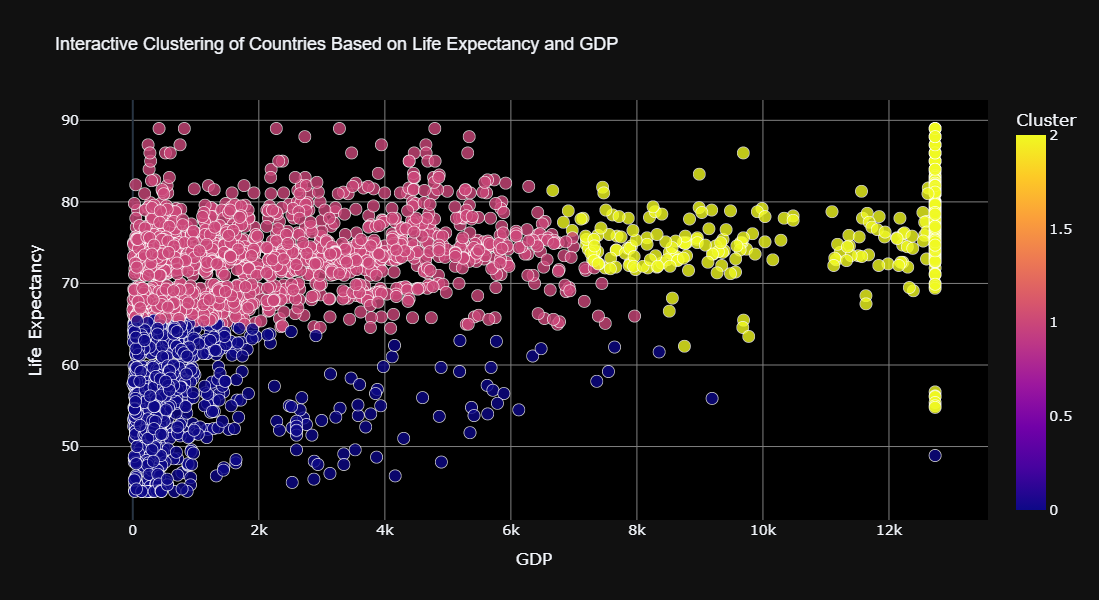

Cluster Summary:
         Life expectancy           GDP  Schooling
Cluster                                          
0              56.952604    828.646644   8.627477
1              73.057847   2296.167665  12.754367
2              77.610419  11723.809593  14.946399


In [370]:
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ensuring 'Country' exists in the dataset and scale the features
if 'Country' not in df.columns:
    raise ValueError("The column 'Country' is missing from the dataset. Please ensure it is included.")

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['GDP', 'Life expectancy']])

# Performing KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Creating an interactive scatter plot
fig = px.scatter(
    df,
    x='GDP',
    y='Life expectancy',
    color='Cluster',
    hover_name='Country',
    hover_data={
        'GDP': ':.2f', 
        'Life expectancy': ':.2f' 
    },
    title='Interactive Clustering of Countries Based on Life Expectancy and GDP',
    labels={'GDP': 'GDP', 'Life expectancy': 'Life Expectancy'},
    template='plotly_dark'
)

# Adjust marker properties for better separation
fig.update_traces(
    marker=dict(
        size=12,  
        opacity=0.8,  
        line=dict(width=0.8, color='white')  
    )
)

# Updating layout for better readability
fig.update_layout(
    height=600,
    width=900,
    legend_title="Cluster",
    font=dict(size=14),
    title_font=dict(size=18, family='Arial, sans-serif'),
    xaxis_title="GDP",
    yaxis_title="Life Expectancy",
    plot_bgcolor="black",  
    xaxis=dict(gridcolor="gray"),
    yaxis=dict(gridcolor="gray")   
)

# Show the interactive plot
fig.show()

# Cluster Summary
cluster_summary = df.groupby('Cluster')[['Life expectancy', 'GDP', 'Schooling']].mean()
print("Cluster Summary:")
print(cluster_summary)

# Explanation of the Chart:
The chart shows clusters of countries based on their GDP (x-axis) and Life Expectancy (y-axis). Each dot represents a country, and the colors indicate different clusters formed by grouping countries with similar characteristics. This helps us visually understand patterns and differences among countries in terms of economic development and health outcomes.

# Key Observations:

**1. Cluster 0 (Purple):**
- Countries in this group have the **lowest GDP** and **shortest life expectancy**.
- These countries also tend to have lower levels of education and health facilities.
- Likely represents **underdeveloped nations** facing challenges like poverty, limited access to healthcare, and poor infrastructure.

**2. Cluster 1 (Teal):**
- Countries in this group have the **highest GDP** and **longest life expectancy**.
- They also enjoy higher education levels and access to advanced healthcare systems.
- Likely corresponds to **developed nations** with strong economies and excellent public health standards.

**3. Cluster 2 (Yellow):**
- This group represents countries with **mid-range GDP** and **moderate life expectancy**.
- These nations are on the path to growth, with improving education systems and healthcare.
- Likely represents **developing countries**, transitioning towards better economic and health outcomes.

# Key Patterns:

1. **Relationship Between GDP and Life Expectancy:**
   - A positive trend is visible: countries with higher GDP tend to have longer life expectancy. This indicates that economic growth supports better healthcare and living standards.

2. **Clusters Highlight Outliers:**
   - The clusters help identify countries that deviate from the trend, such as countries with relatively high GDP but lower life expectancy, or vice versa.

# Insights for Policymakers:

**1. Cluster 0 (Underdeveloped Nations):**
- **Needs:** Basic healthcare, improved education, and poverty alleviation.
- **Actions:** International aid, healthcare access programs, and investments in education and infrastructure.

**2. Cluster 1 (Developed Nations):**
- **Needs:** Address aging populations and preventive healthcare to sustain high life expectancy.
- **Actions:** Invest in healthcare innovation, support for elderly care, and maintain economic stability.

**3. Cluster 2 (Developing Nations):**
- **Needs:** Continued economic growth and improved health infrastructure.
- **Actions:** Strengthen higher education systems, expand healthcare access, and create policies to support sustainable development.

# Conclusion:
This chart provides valuable insights into global patterns of development and healthcare. By understanding these clusters, policymakers can better target their efforts and allocate resources to address the unique needs of each group, ultimately improving quality of life worldwide.
